In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from sklearn.cluster import AgglomerativeClustering,KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Projekt - Określenie klasy wydolności organizmu
## Jędrzej Dubiak, Jan Szopa
### Dane zostały zaczerpnięte z: https://www.kaggle.com/datasets/kukuroo3/body-performance-data/data

### Analiza eksploracyjna

In [26]:
# wczytanie danych
data = pd.read_csv("https://raw.githubusercontent.com/duubson/PRiAD/main/bodyPerformance.csv")

In [27]:
# wyświetlenie 5 pierwszych i 5 ostatnich obiektów ze zbioru danych
data

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0           54.9                     18.4            60.0          217.0     C  
1           36.4                     16.3            53.0          229.0     A  
2           44.8                     12.0            49.0          181.0     C  
3           41.4                     15.2            53.0          219.0     B  
4           43.5                     27.1            45.0          217.0     B  
...          ...                      ...             ...            ...   ...  
13388       35.8                     17.4            47.0          198.0     C  
13389       33.0                      1.1            48.0          167.0     D  
13390       63.5                     16.4            45.0          229.0     A  
13391       19.3                      9.2             0.0           75.0     D  
13392       35.9                      7.1            51.0          180.0     C  

[13393 rows x 12 columns]

Zbiór zawiera dane dotyczące sprawności fizycznej 13392 osób. Każdą osobę opisuje 11 atrybutów opisanych w języku angielskim. Atrybuty dotyczą sprawności fizycznej ('gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'), parametrów fizycznych ('height_cm', 'weight_cm', body fat_%') oraz ciśnienie rozkurczowe i skurczowe ('diastolic', 'systolic') oraz wiek ('age'). Ostatnim atrybutem jest przydział do klasy.

Z opisu zbioru danych wynika, że klasa A odpowiada najlepszej sprawności fizycznej, klasa D najgorszej sprawności. Wszystkie atrybuty poza podziałem na klasy oraz płcią są liczbami. 5 z nich to liczby całkowite, a 5 zmiennoprzecinkowe.

In [28]:
# wygenerowanie statystyk opisowych zbioru danych
data.describe()

age     height_cm     weight_kg    body fat_%     diastolic  \
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
mean      36.775106    168.559807     67.447316     23.240165     78.796842   
std       13.625639      8.426583     11.949666      7.256844     10.742033   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000     75.300000     28.000000     86.000000   
max       64.000000    193.800000    138.100000     78.400000    156.200000   

           systolic     gripForce  sit and bend forward_cm  sit-ups counts  \
count  13393.000000  13393.000000             13393.000000    13393.000000   
mean     130.234817     36.963877                15.209268       39.771224   
std       14.713954     10.624864                 8.456677       14.276698   
min        0.000000      0.000000               -25.000000        0.000000   
25%      120.000000     27.500000                10.900000       30.000000   
50%      130.000000     37.900000                16.200000       41.000000   
75%      141.000000     45.200000                20.700000       50.000000   
max      201.000000     70.500000               213.000000       80.000000   

       broad jump_cm  
count   13393.000000  
mean      190.129627  
std        39.868000  
min         0.000000  
25%       162.000000  
50%       193.000000  
75%       221.000000  
max       303.000000

Powyżej przedstawiliśmy opis danych ze zbioru, wartości średnie, minimalne, maksymalne a także kwartyle dla każdego atrybutu numerycznego

In [8]:
# Wyświetlenie informcji o zbiorze danych

#Liczba wszystkich obiektów
print("Obiektów = ", data.shape[0])

#Liczba klas
kl = data.iloc[:,-1]
print("Klas =",kl.unique().shape[0])

#Liczba obiektów w danej klasie
for i in list(kl.unique()):
    print("Obiektów w klasie ", i, "= ", len(data[data["class"] == i]))

#Liczba atrybutów
print("Atrybutów = ", data.shape[1])

#Liczba Braków
print("Braków = ",data.isnull().sum().sum())

Obiektów =  13393
Klas = 4
Obiektów w klasie  C =  3349
Obiektów w klasie  A =  3348
Obiektów w klasie  B =  3347
Obiektów w klasie  D =  3349
Atrybutów =  12
Braków =  0


Można zauważyć, że w każdej z klas liczba obiektów jest taka sama pomimo występowania stosunkowo dużej liczby unikalnych obiektów w całym zbiorze danych. 

Zbiór nie zawiera żadnych braków, każdy obiekt opisany jest przez 12 atrybutów.

Ostatni atrybut jest decyzyjny \(wskazuje na klasę\).


In [9]:
# Zmiana kolumny z atrybutem płeć, na taką w której znajdują się liczby całkowite. 1 - mężczyzna, 0 - kobieta
data = pd.get_dummies(data, columns=['gender'], drop_first=True, dtype=int)

<Axes: >

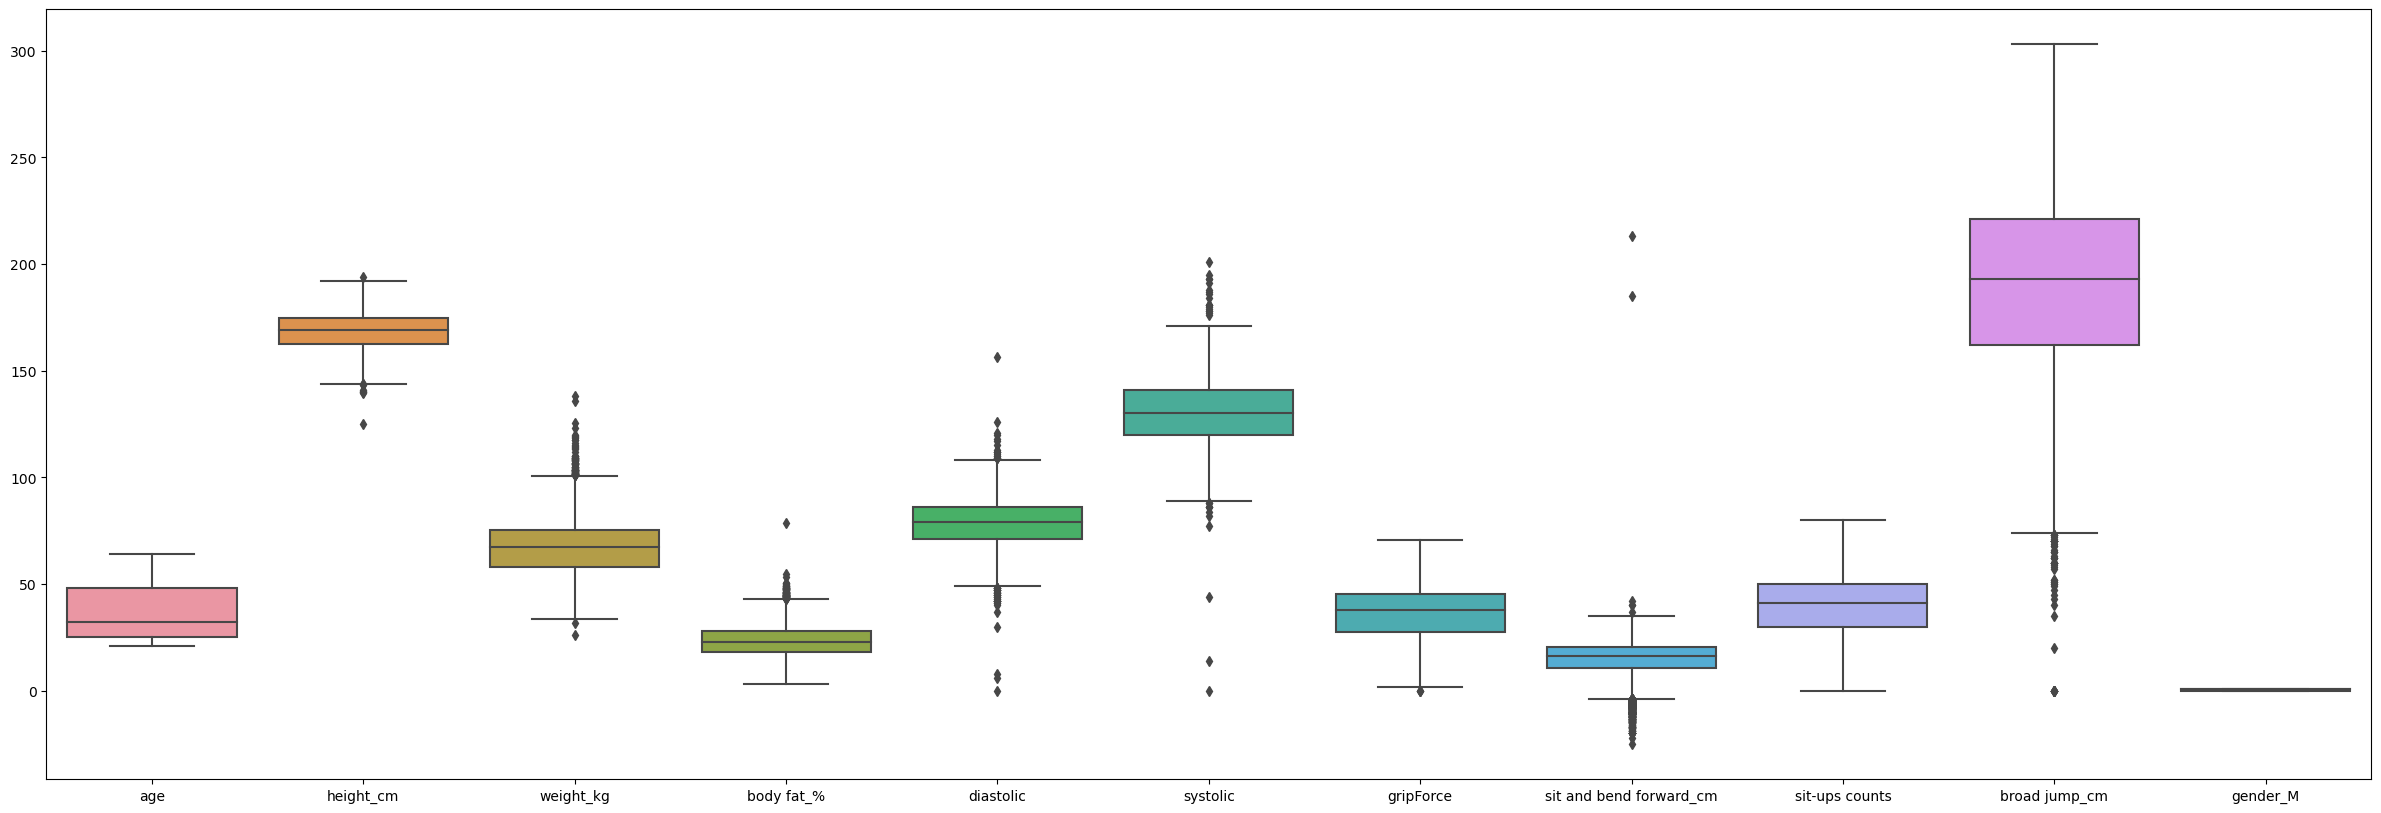

In [13]:
#wykresy rozkładu wartości w danym atrybucie

#rozmiar figury pod wykres
plt.figure(figsize=(30,10))

#wykres pudełkowy
sns.boxplot(data=data)

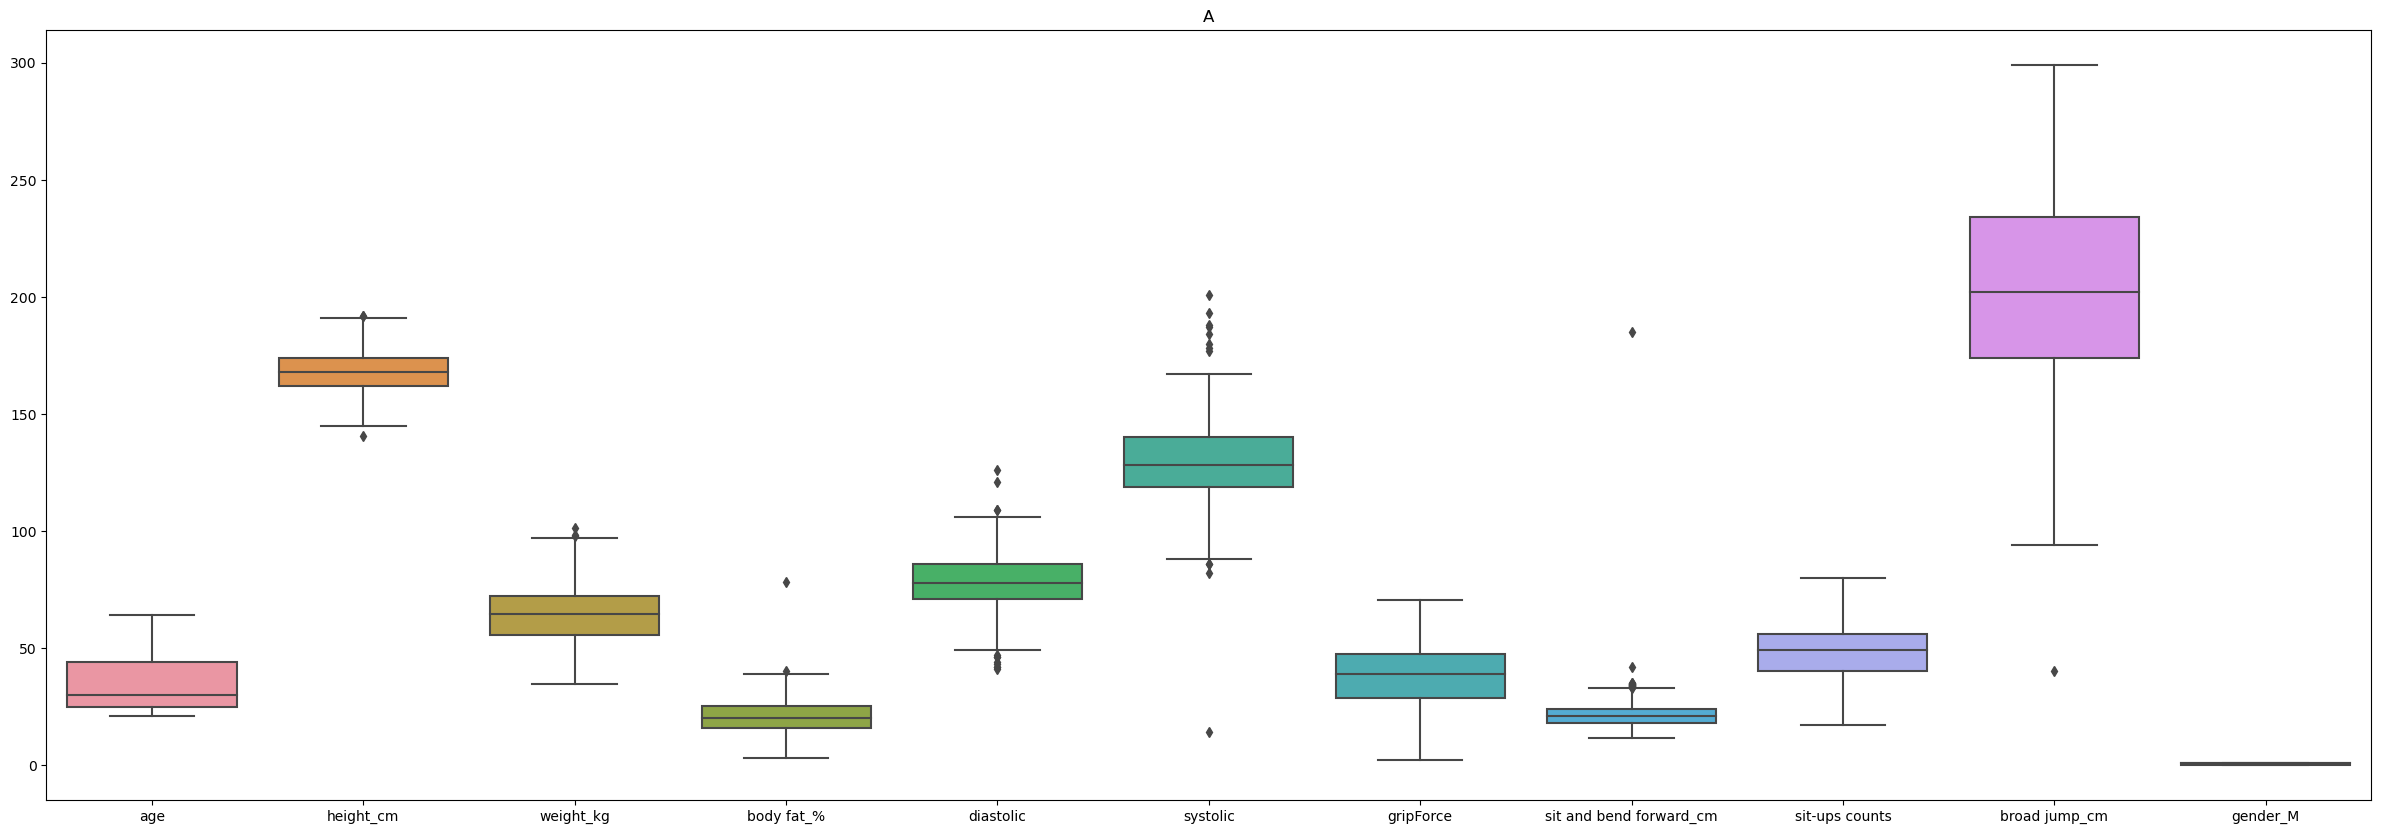

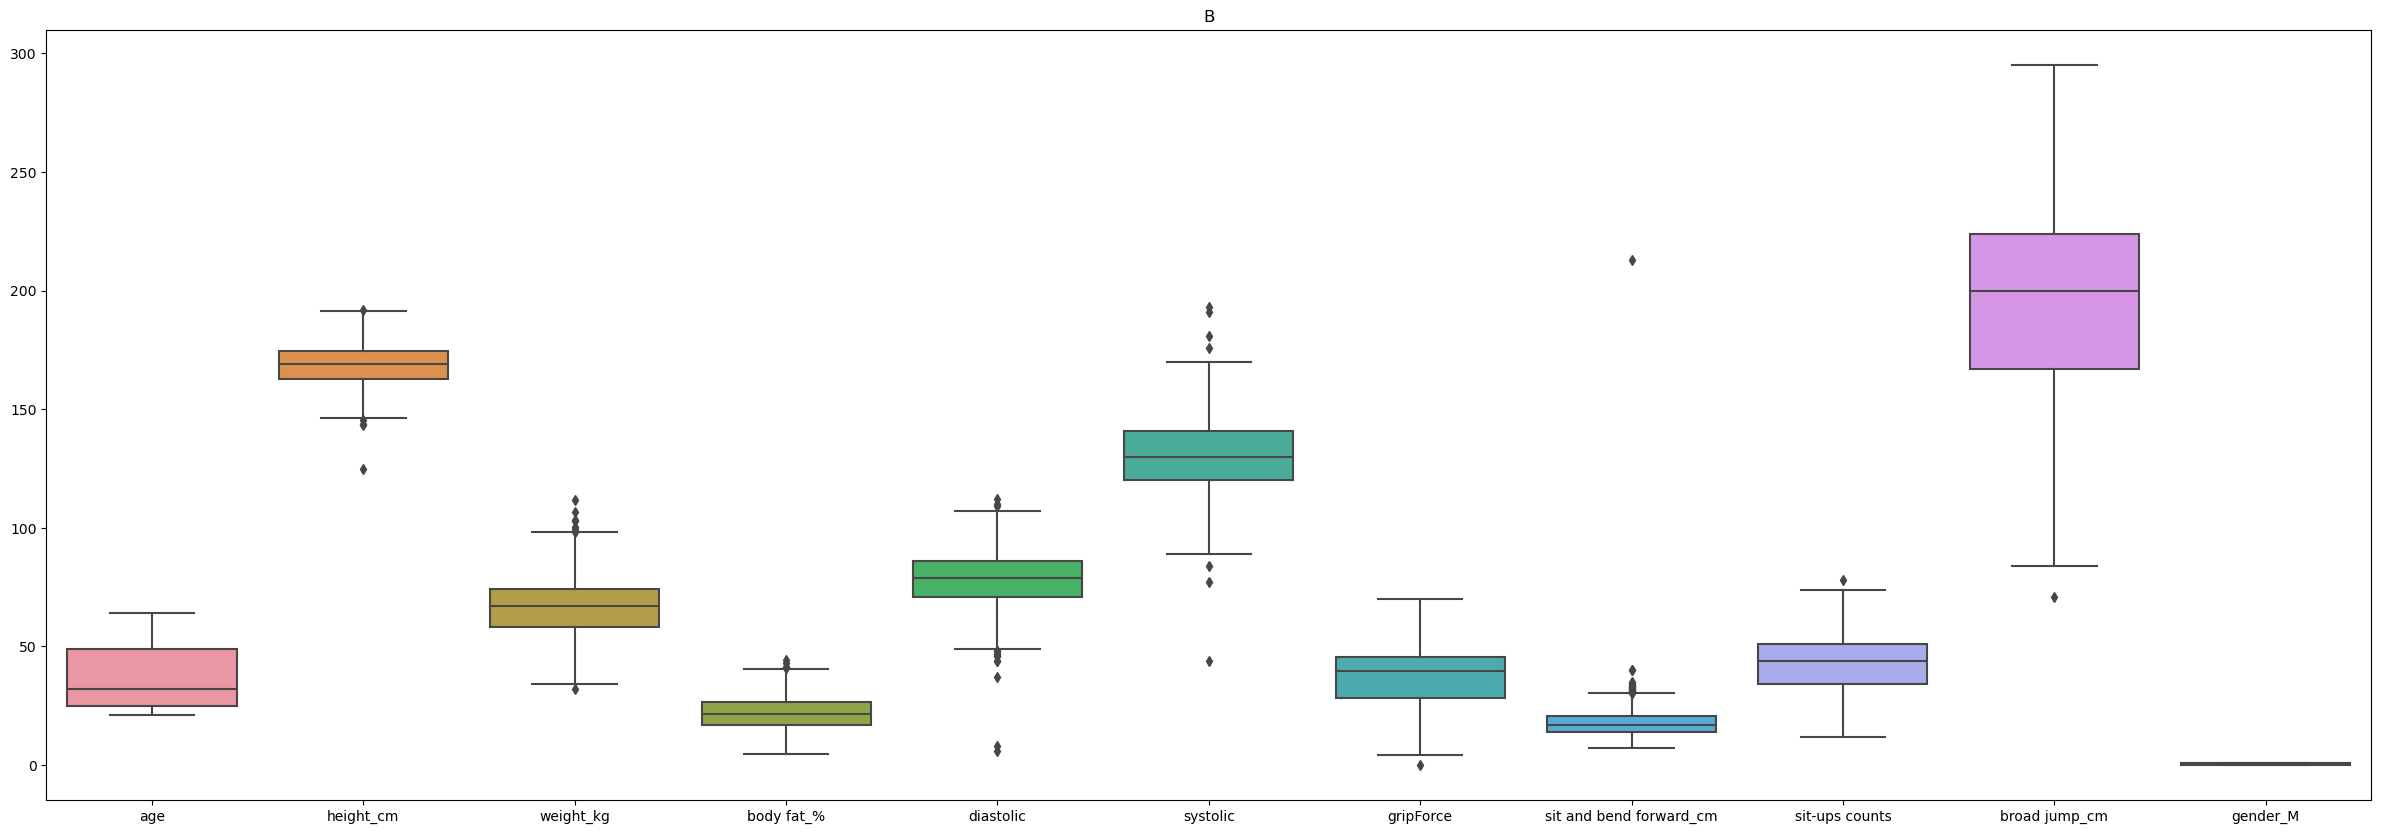

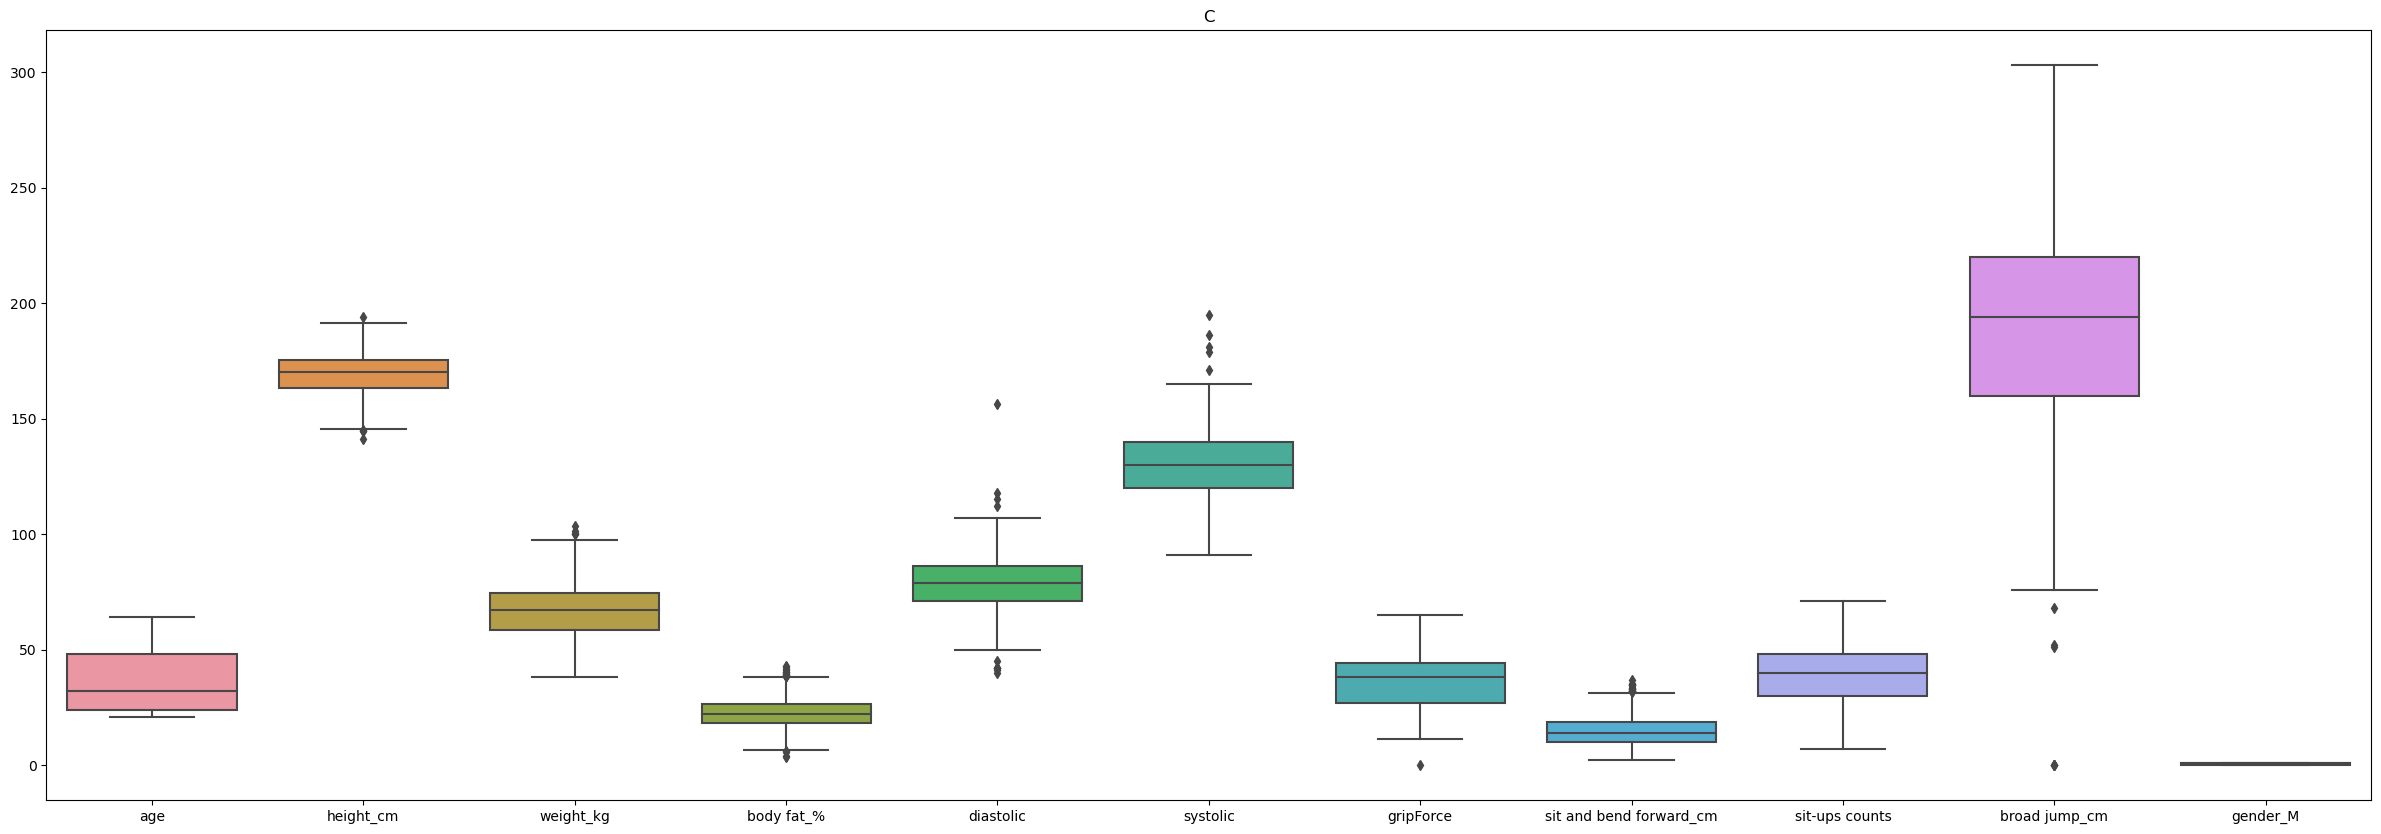

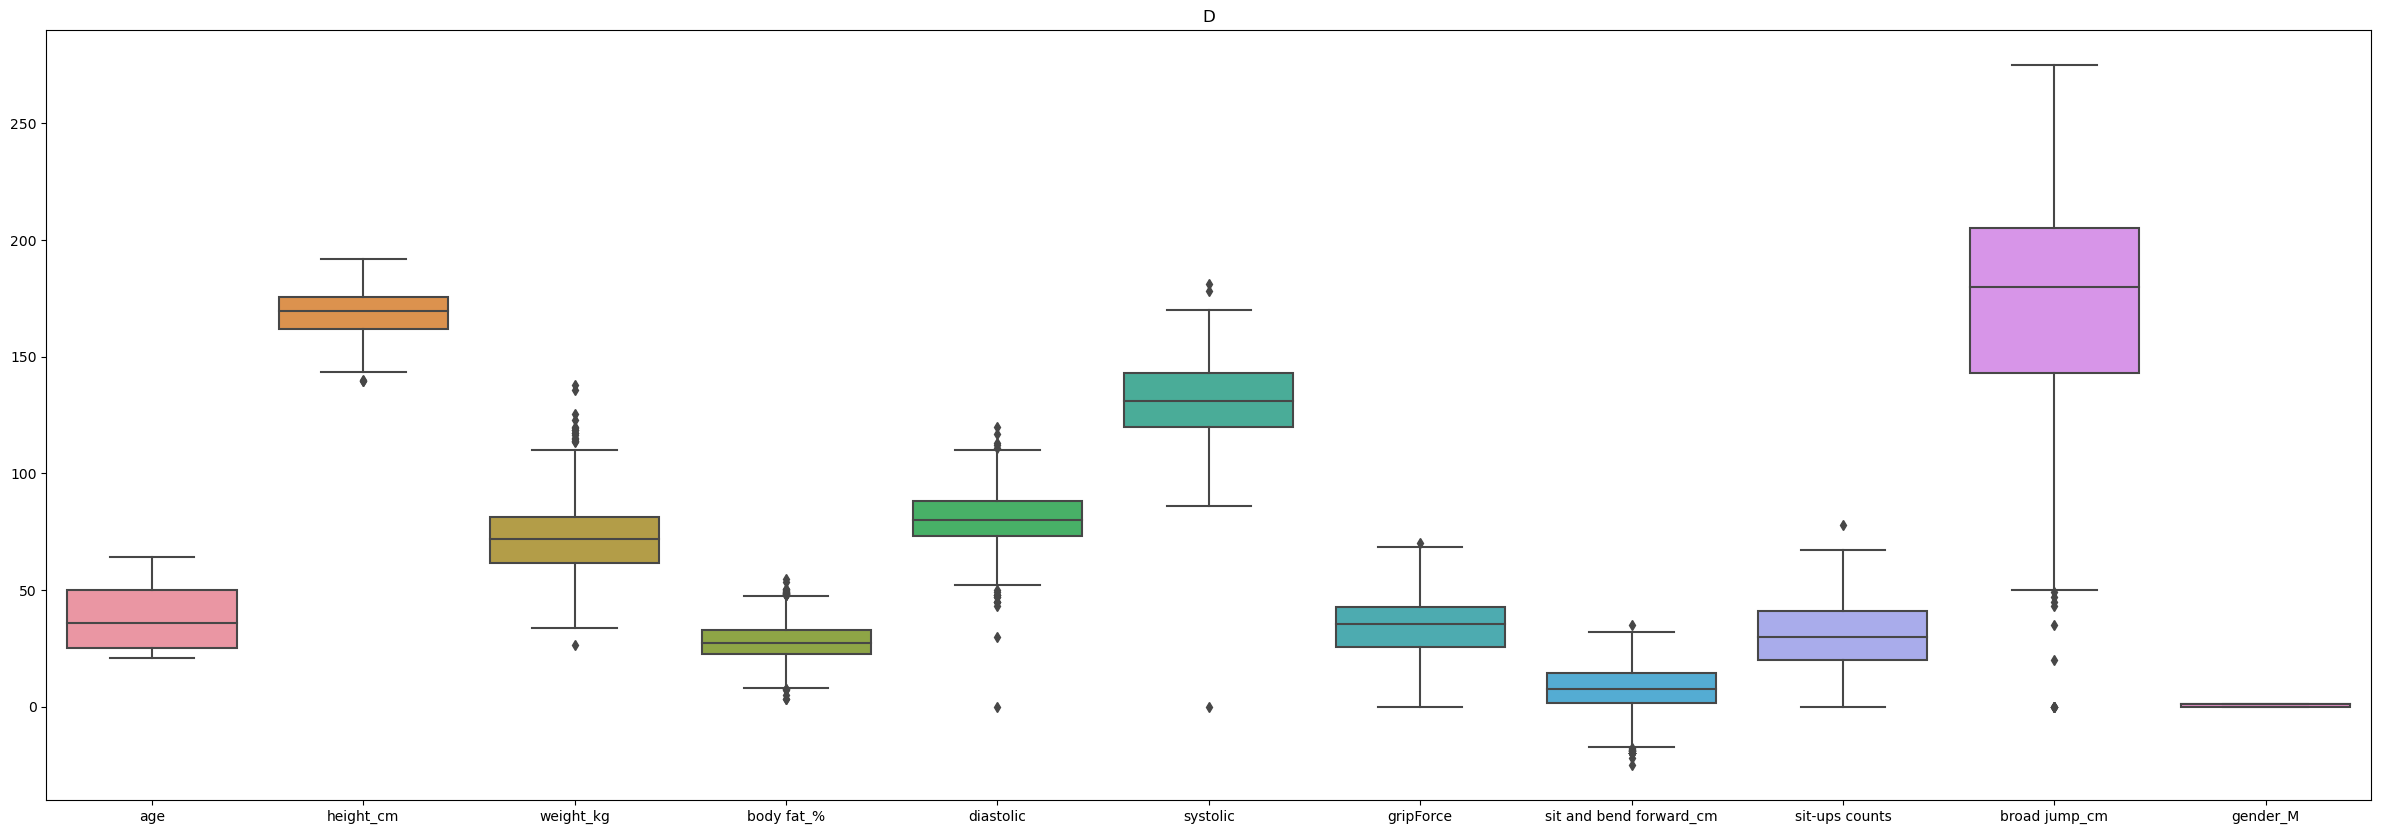

In [9]:
# Wyświetlenie rozkładu wartości każdego atrybutu dla poszczególnych klas
for k in ['A','B','C','D']:
    #bierzemy dane dla konkretnej klasy
    dane_k = data[data["class"] == k] 
    plt.figure(figsize=(30,10))
    plt.title(k)
    sns.boxplot(data=dane_k)

Z powyższych wykresów widzimy, że niezależnie dla każdej klasy rozkład wartości atrybutów jest bardzo zbliżony. W niemal żadnej klasie nie ma jednego atrybutu który w jakiś sposób wyróżniał by te klasę względem innych, co może utrudniać wykonanie grupowania. Poza rozkładem całego zbioru wartości nawet wartości median w każdym atrybucie są zbliżone do siebie w każdej klasie.

W każdej klasie występują pojedyncze wartości odstające, najlepiej można zaobserwować je dla atrybutu 'systolic', w którym te wartości odstające są najbardziej oddalone od wykresów rozkładu wartości.

Najliczniejszy zbiór wartości jest w przypadku atrybutu 'broad jump_cm', który przyjmuje wartości od 0 do 303 cm, dla porównania atrybut 'sit and bend forward_cm' przyjmuje wartości tylko od -25 do około 50 cm, poza pojedynczymi wartościami odstającymi osiągającymi nawet 213 cm.

W klasie D możemy zauważyć nietypowe wartości atrybutu 'sit and bend forward_cm' , którego niektóre wartości są ujemne.


<Axes: xlabel='class', ylabel='broad jump_cm'>

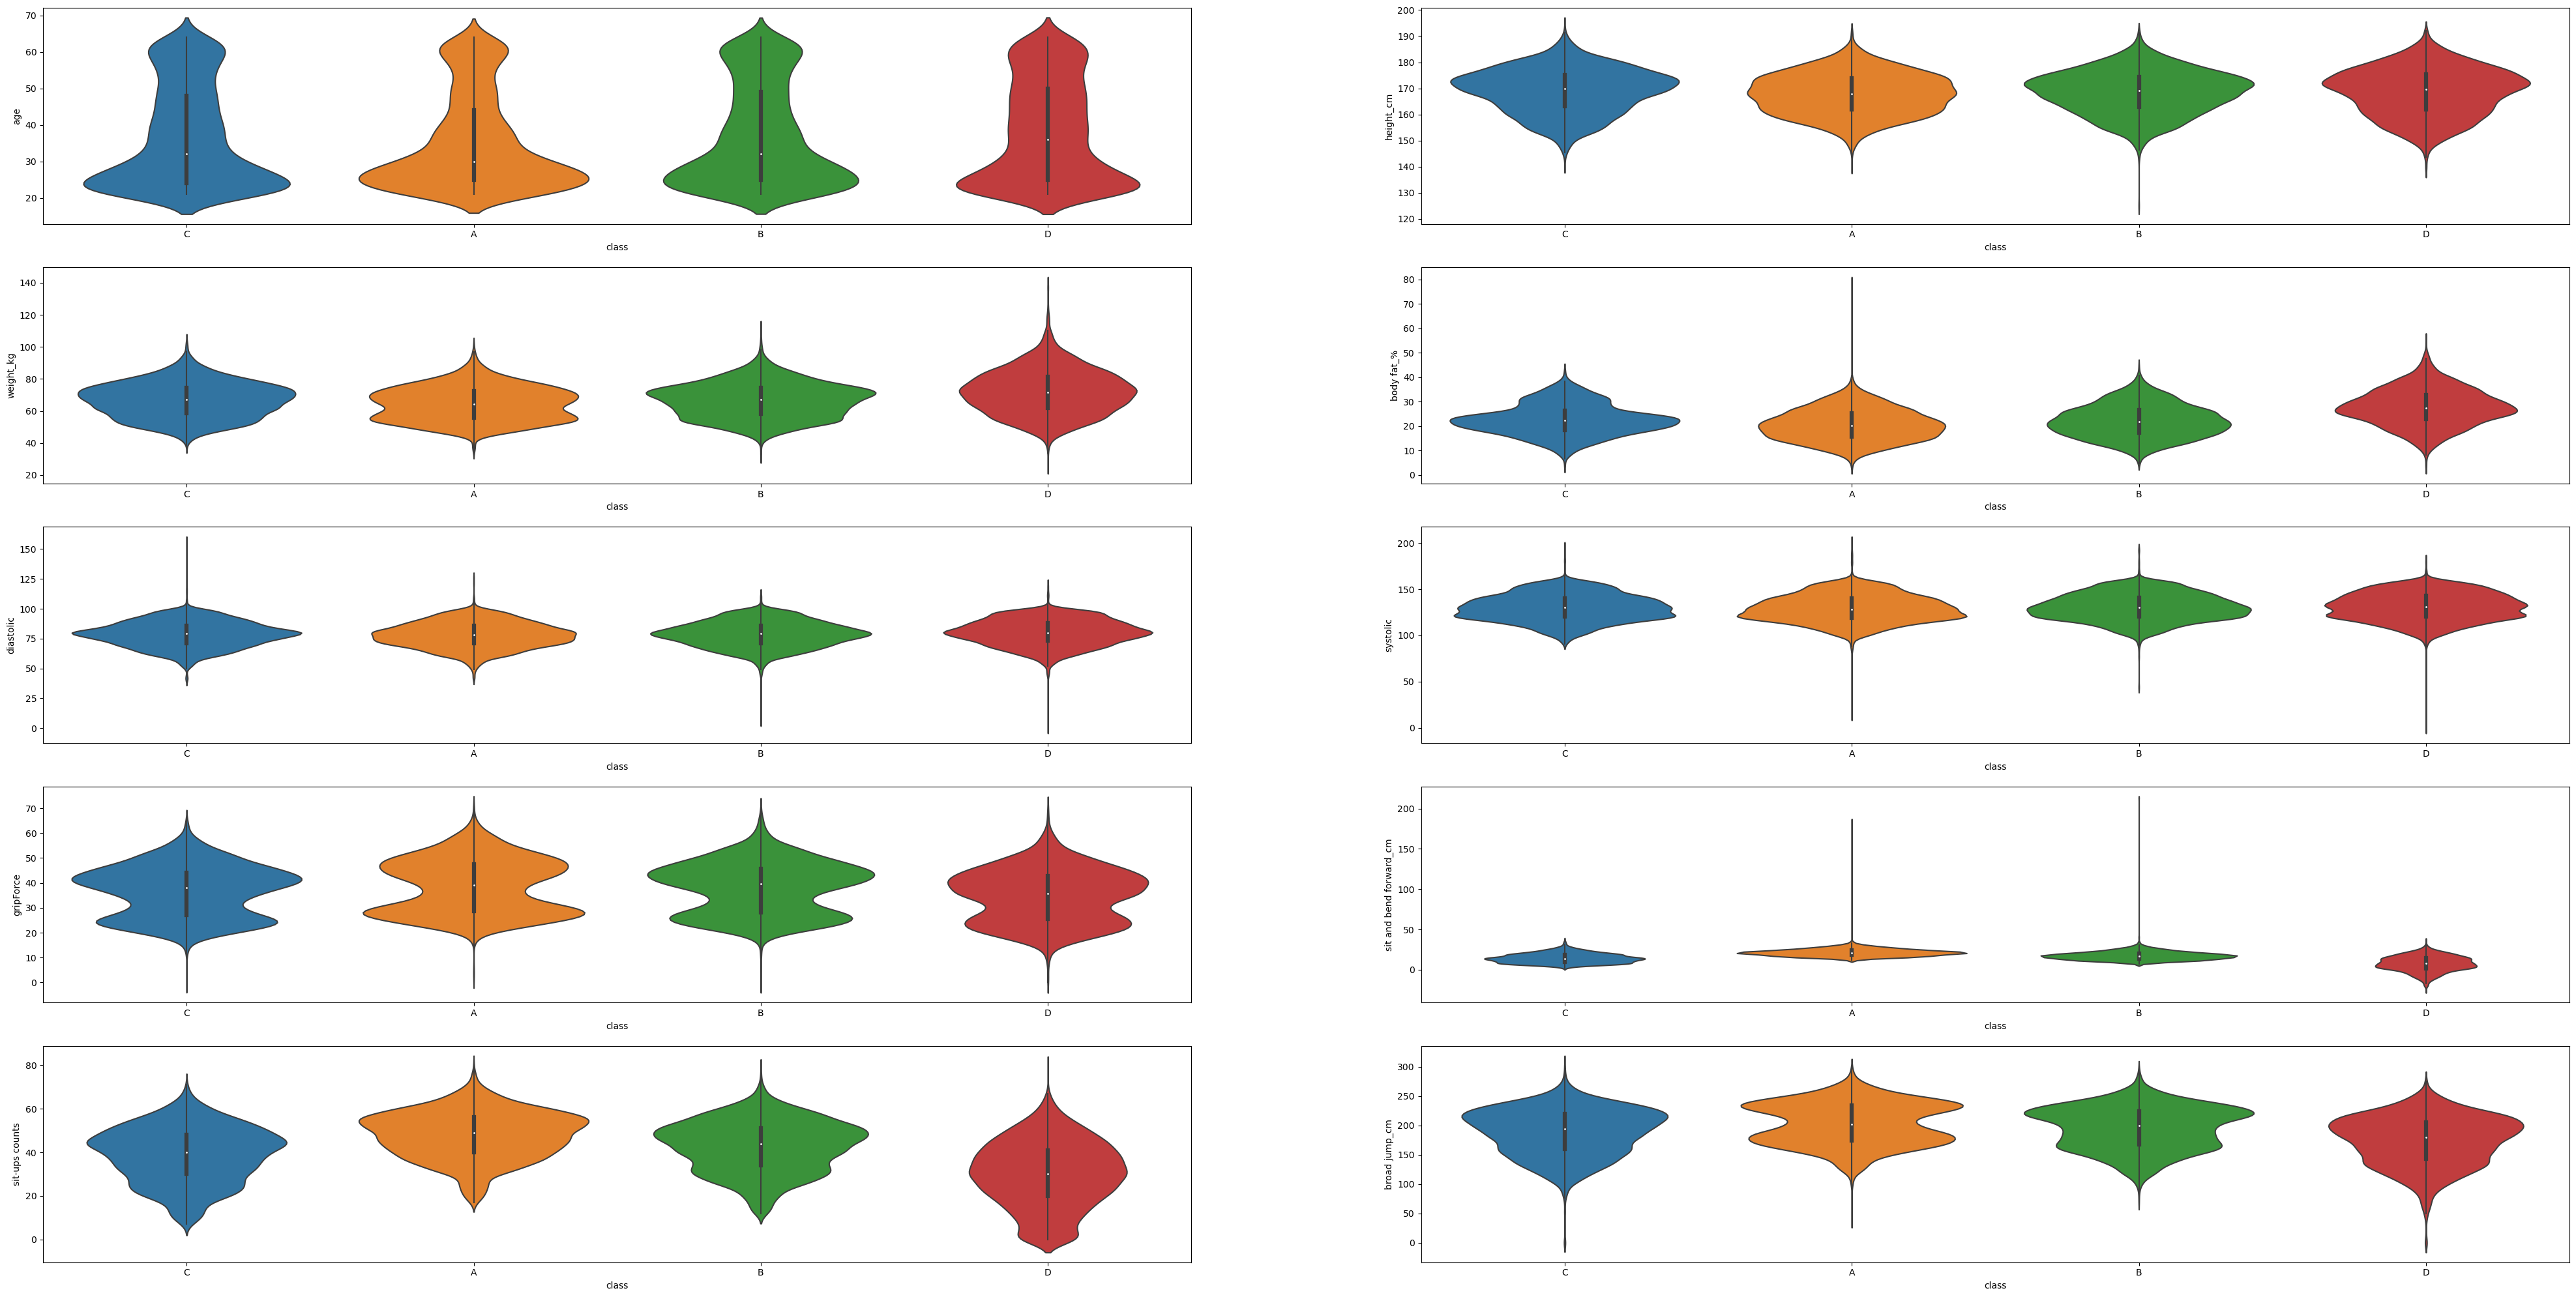

In [10]:
#rozkład wartości pojednyńczego atrybutu dla każdej klasy

plt.figure(figsize=(50,25))
plt.subplot(5,2,1)

#wykres skrzypcowy danego atrybutu od każdej z klas
sns.violinplot(x = "class", y = "age", data=data)
plt.subplot(5,2,2)
sns.violinplot(x = "class", y = "height_cm", data=data)
plt.subplot(5,2,3)
sns.violinplot(x = "class", y = "weight_kg", data=data)
plt.subplot(5,2,4)
sns.violinplot(x = "class", y = "body fat_%", data=data)
plt.subplot(5,2,5)
sns.violinplot(x = "class", y = "diastolic", data=data)
plt.subplot(5,2,6)
sns.violinplot(x = "class", y = "systolic", data=data)
plt.subplot(5,2,7)
sns.violinplot(x = "class", y = "gripForce", data=data)
plt.subplot(5,2,8)
sns.violinplot(x = "class", y = "sit and bend forward_cm", data=data)
plt.subplot(5,2,9)
sns.violinplot(x = "class", y = "sit-ups counts", data=data)
plt.subplot(5,2,10)
sns.violinplot(x = "class", y = "broad jump_cm", data=data)

Na pierwszy rzut oka, tak jak poprzednio, większość atrybutów ma bardzo podobne wartości niezależnie od klasy. Możemy jednak wyróżnić, że atrybut 'sit\-ups counts' przyjmuje trochę mniejsze wartości dla klasy D \(z założenia najmniejsza wydolność\).

Atrybut 'broad jump\_cm' dla klas C oraz D przyjmuje minimalnie mniejsze wartości niż dla klas A i B.

Na tych wykresach łatwiej zauważyć, że również wartości atrybutów sit\-ups counts \(dla klasy D\) oraz broad jump\_cm \(dla klas C i D\) schodzą lekko poniżej zera, co nie zgadza się z wcześniejszą analizą \(dane.describe\(\)\) gdzie minimalne wartości dla tych atrybutów wyszły równe 0. 



<Axes: >

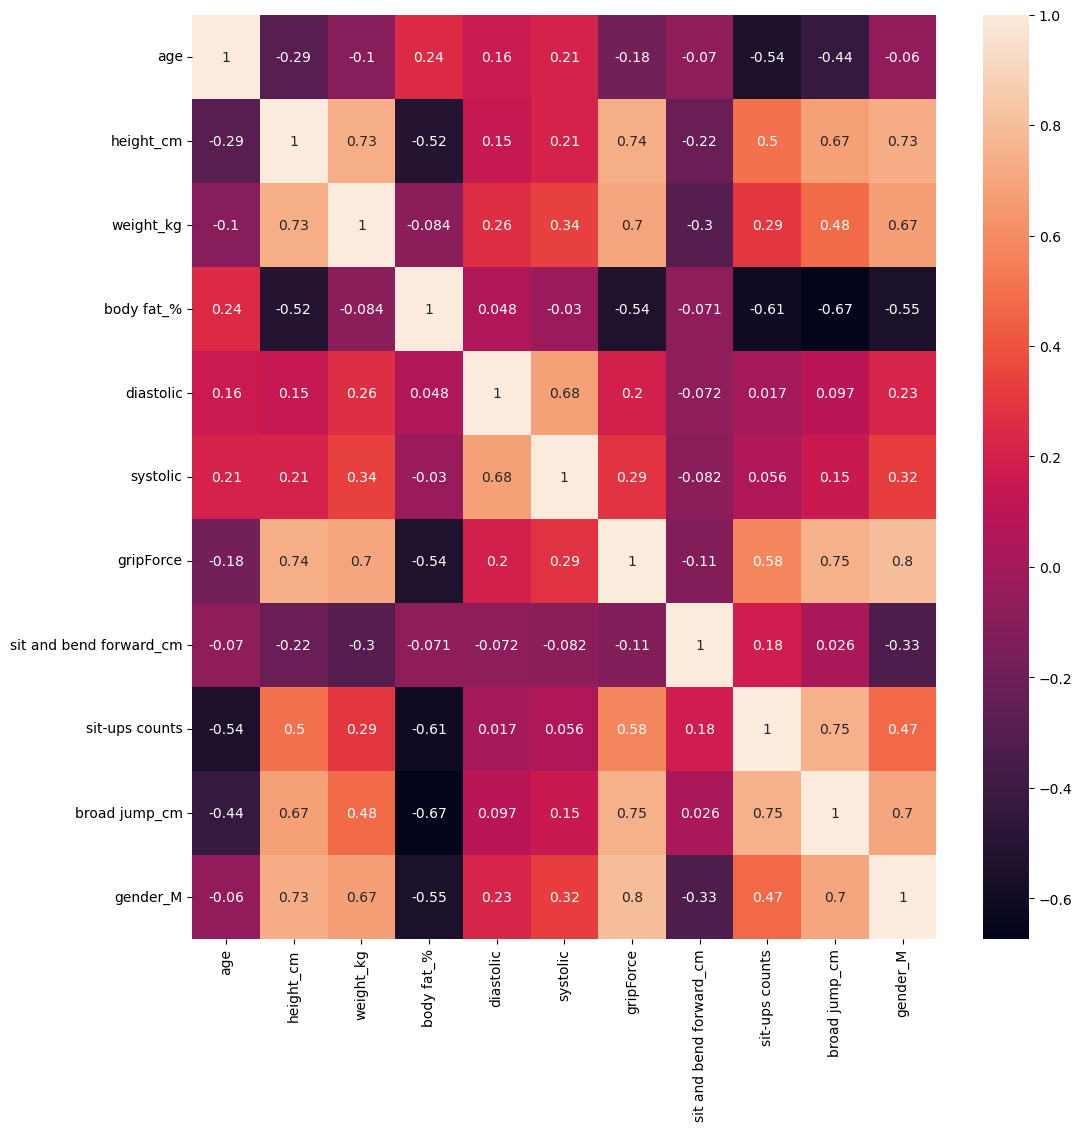

In [15]:
#Macierz korelacji w postaci heat mapy

#usuwamy kolumnę z klasą
dane = data.drop(columns = ['class'])
#korelacje między danymi, atrybutami
kor = dane.corr()
plt.figure(figsize=(12,12),dpi=100)
#"mapa ciepła"/heatmap
sns.heatmap(kor, annot=kor)

Z heat mapy korelacji można zauważyć, mało skorelowanym atrybutem jest 'sit and bend forward_cm'. Jego korelacja z innymi atrybutami przyjmuje wartości od -0.3 do 0.18. Najmniejszą korelacje atrybut wykazuje z atrybutem 'broad jump_cm'. Inny atrybutem wykazującym małą korelację jest 'diastolic', dla niego korelacja przyjmuje dwie z trzech najmniejszych wartości 0.017 i 0.048.

Najmocniej skorelowanymi atrybutami są z kolei 'gripForce' i 'gender_M'. Ich korelacja to, aż 0.8, wartość zbliżona do jedynki. Atrybutem wykazującym mocną korelację z kilkoma innymi jest także 'broad jump_cm'. Z dwoma atrybutami jego korelacja wynosi 0.75 - 'gripForce' oraz 'sit-ups counts'. Atrybut 'gender_m'  z żadnym z atrybutów, poza wiekiem nie jest skorelowany gorzej niż  0.23. Dla atrybutów związanych z aktywnością fizyczną, czyli np. 'girpForce', 'broad jump_cm' czy 'sit-ups counts' korelacja jest mocniejsza co ma sens -  z reguły mężczyźni wykazują większą sprawność fizyczną od kobiet.

Cały zbiór danych nie wykazuje zbyt wielu korelacji pomiędzy atrybutami. Mniejsza część wartości z heatmapy jest zbliżona do wartości 1 lub -1. Nie można wyróżnić dwóch atrybutów o korelacji na tyle wysokiej, żeby jeden z tych dwóch atrybutów można było odrzucić.

Z heat mapy można wywnioskować, że najlepszą parą atrybutów do grupowania mogą być któreś z par: 'sit-ups counts' i 'diastolic' - korelacja 0.017, 'diastolic' i 'body fat_%' - korelacja 0.048, 'sit and bend forward_cm' i 'broad jump_cm' - korelacja 0.026,  

C:\Users\Janek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


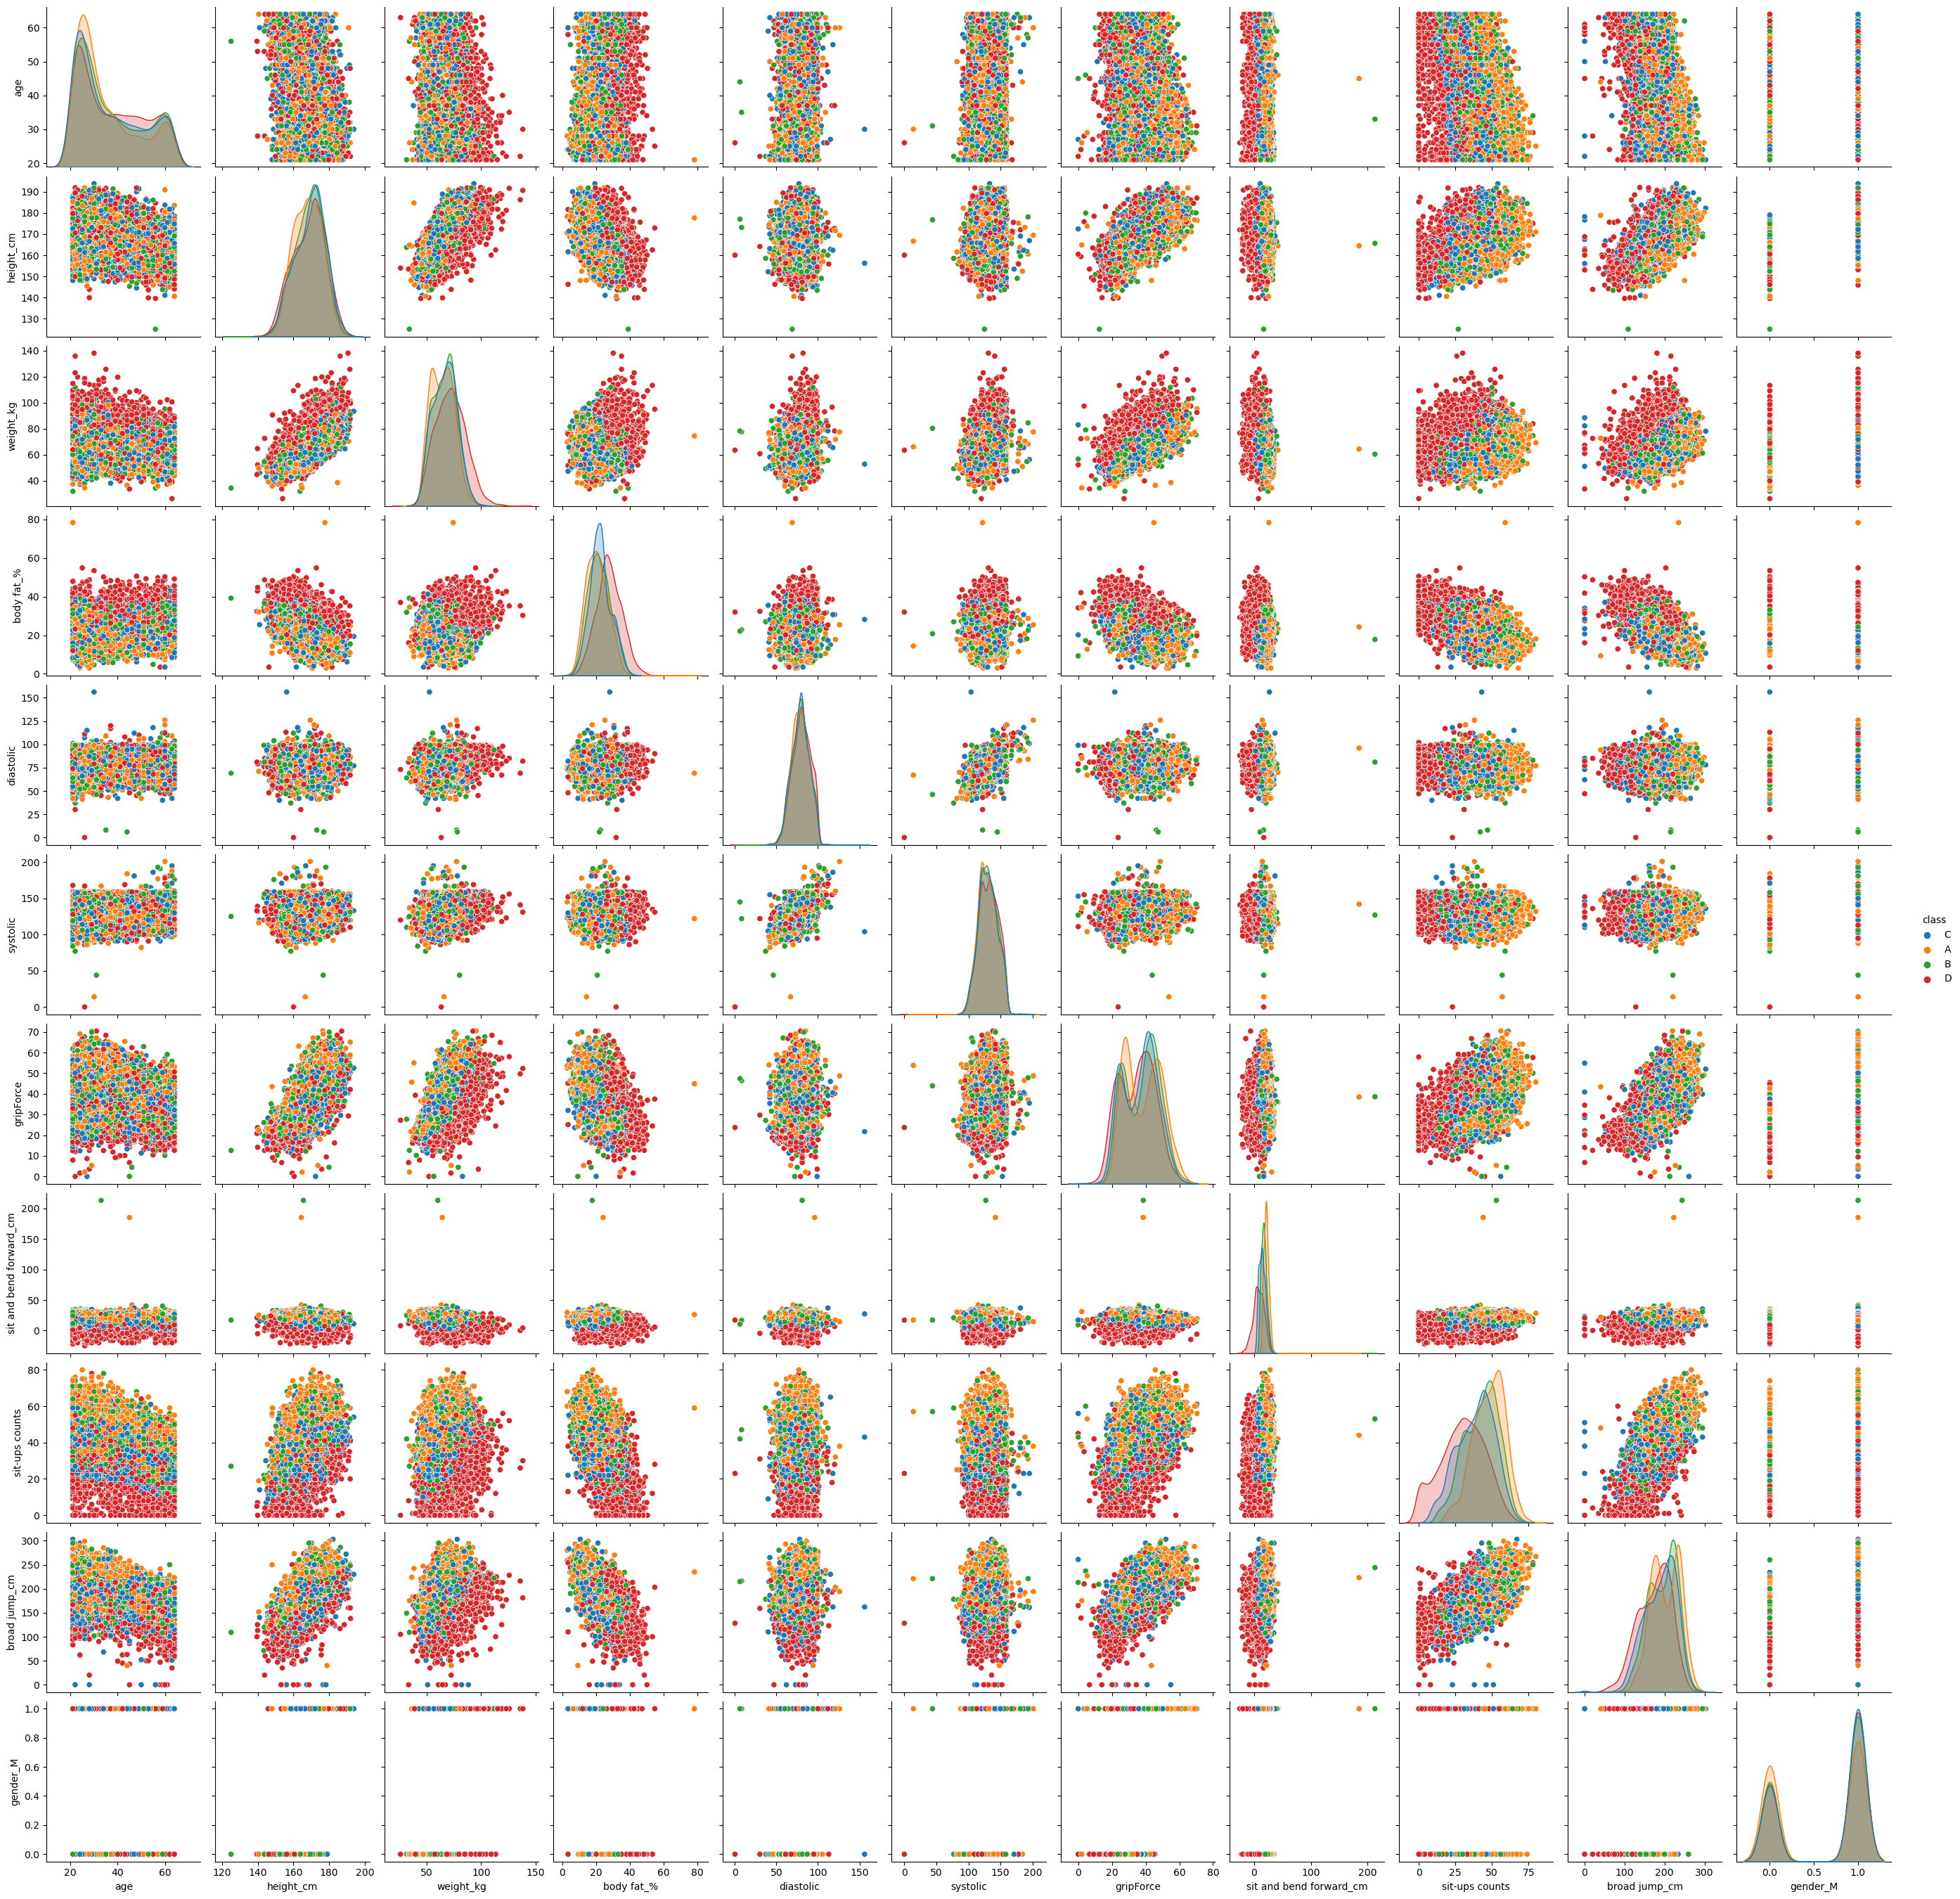

In [12]:
#macierz korelacji
sns.pairplot(data, kind="scatter", hue="class")

Na macierzy korelacji widać, że niemal dla każdego atrybutu wartości tworzą jedną spójną grupę z pojedynczymi odstępstwami. Patrząc na podział na grupy widać, że ciężko jest wskazać na jakiej podstawie ten podział następował.

Wartości atrybutów z różnych grup przeplatają się ze sobą bez określonego porządku dla większości grup. Jedyne odstępstwa widać dla atrybutu 'sit and bend forward_cm', w którym grupa D wyraźnie przyjmuje najmniejsze wartości. Podobnie patrząc na histogramy widzimy, że w każdym atrybucie histogramy pokrywają się z wyjątkiem pojedynczych np. dla 'sit-ups count' lub 'sit and bend forward_cm', gdzie jesteśmy w stanie wyróżnić histogram grupy D lub grupy A.

Z tej macierzy możemy zauważyć, że grupa B oraz B są ciężko rozróżnialne, dla każdego atrybutu histogram grupy B i C pokrywają się, natomiast A i D są lepiej rozróżnialne. Może to sugerować, że więcej sensu miałby podział zbioru na trzy a nie na cztery grupy co będziemy próbować robić w kolejnej części.

## Grupowanie hierarchiczne

Do przeprowadzenia grupowania musieliśmy wybrać dwa atrybuty dla których to grupowanie da najlepsze wyniki. Po przeanalizowaniu wyników analizy eksploracyjnej uznaliśmy, że atrybutami do grupowania będą 'broad jump_cm' oraz 'sit and bend forward_cm'.

Z heat mapy korelacji odczytaliśmy, że najmnijesz korelacja zachodzi między atrybutami 'diastolic' oraz 'sit-ups counts', jednak atrybut 'diastolic' miał praktycznie identyczny rozkład wartości dla każdej klasy, więc odrzuciliśmy go.

Drugą najmniejszą korelację zaobserwowaliśmy dla pary atrybutów 'broad jump_cm' i 'sit and bend forward_cm'. Oba atrybuty pokazywały nieco inne histogramy dla poszczególnych klas. W macierzy korelacji praktycznie dla każdej pary atrybutów (poza 'gender_m') obserwowaliśmy jedno skupisko punktów, zatem nie wskazywała ona na to, aby te parę odrzucić. W ten sposób to ta para została przez nas wybrana

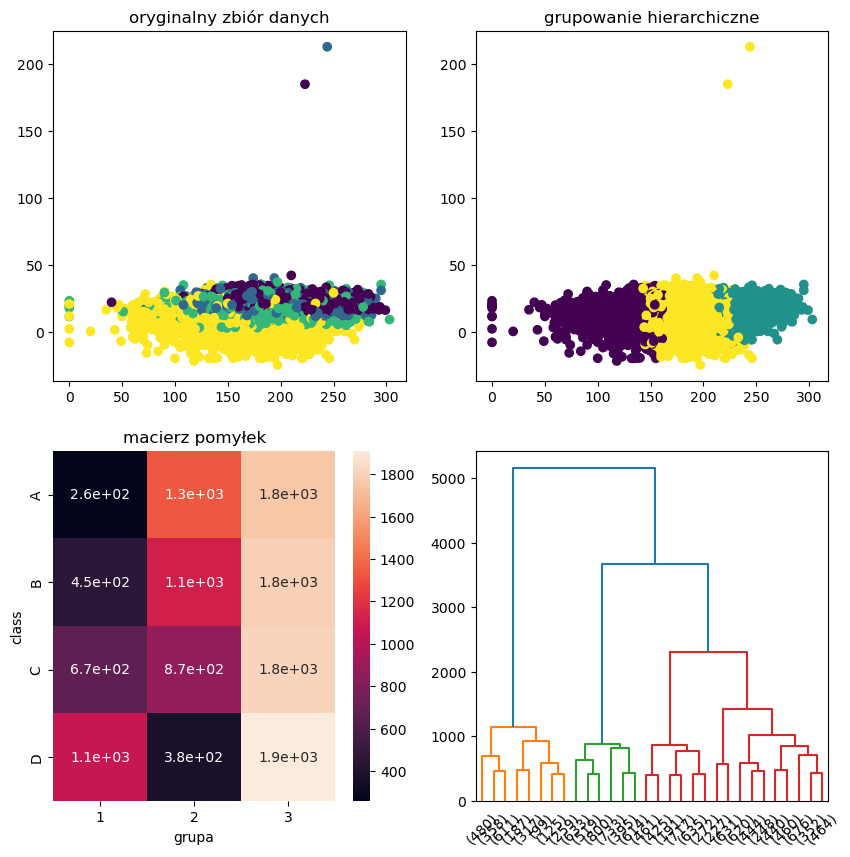

In [16]:
#grupowanie metodą hierarhiczną
#dobre atrybuty

#działamy na danych z już usuniętą informacją o klasie
prog_proc = 70
#łączymy hierarchicznie kolejne najpodobniejsze obiekty i zapisujemy informacje o tym do "grupy"
#ward - metoda łączenia, łączymy dwie grupy o najmniejszej wariancji po połączeniu; euclidean - euklidesowa miara odległości
grupy = linkage(dane, method = 'ward', metric = 'euclidean')
prog = prog_proc*max(grupy[:,2])/100

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
#wykres punktowy 
plt.scatter(x = dane["broad jump_cm"], y = dane["sit and bend forward_cm"], c = data['class'].astype('category').cat.codes)
plt.title('oryginalny zbiór danych')
plt.subplot(2,2,2)
#przypisujemy do kolumny 'grupa' etykiety klastrów, jak zostały połączone w wyniku łączenia funkcją linkage
dane['grupa'] =  fcluster(grupy, prog, criterion = 'distance')
plt.scatter(x = dane["broad jump_cm"], y = dane["sit and bend forward_cm"], c = dane["grupa"])
plt.title('grupowanie hierarchiczne')
plt.subplot(2,2,3)
#macierz pomyłek, ile obiektów z danej klasy trafiło w wyniku grupowania do "grupy jak w oryginalnym podziale"
pomylki = pd.crosstab(data['class'],dane['grupa'])
sns.heatmap(pomylki,annot = pomylki)
plt.title('macierz pomyłek')

plt.subplot(2,2,4)
#dendogram, odwzorowanie struktury połączeń w drzewie, po grupowaniu hierarchicznym
cl = dendrogram(grupy, truncate_mode = 'lastp', color_threshold = prog )
dane['grupa'] =  fcluster(grupy, prog, criterion = 'distance')

Grupowanie hierarchiczne przeprowadziliśmy wykorzystując wcześniej wymienione atrybuty. W wyniku tego grupowania powstały 3 grupy, nie pokrywające się z oryginalnym podziałem na grupy. 

Na dendogramie można zauważyć, że podział na trzy grupy dla tych danych i tak wybranych atrybutów jest naturalny. Obiekty pogrupowane są względem wartości atrybutu 'broad jump_cm'. 

Wartość atrybutu 'sit and bend forward_cm' nie ma aż tak dużego wpływu na grupowanie. Jednak dwa obiekty o największej wartości tego atrybutu, mocno odstające od średniej dla całego zbioru danych są w grupie 2 pomimo, że wartość atrybutu 'broad jump_cm' mogłaby wskazywać na przydzielenie do grupy 3.

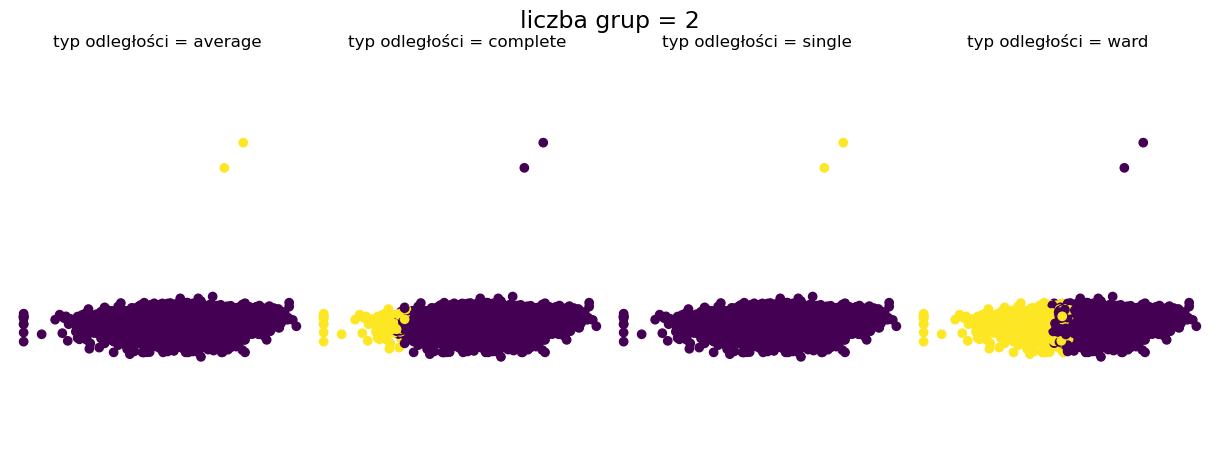

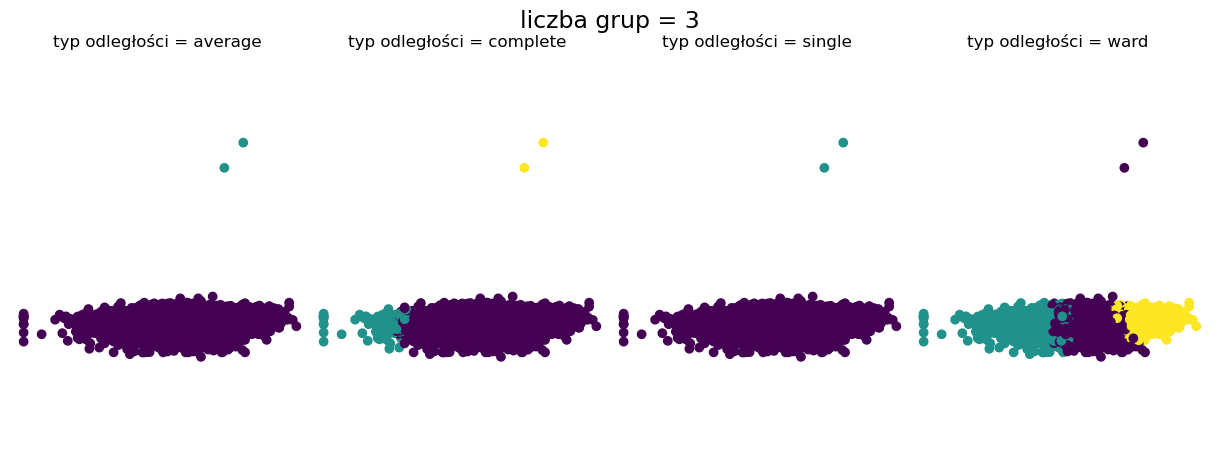

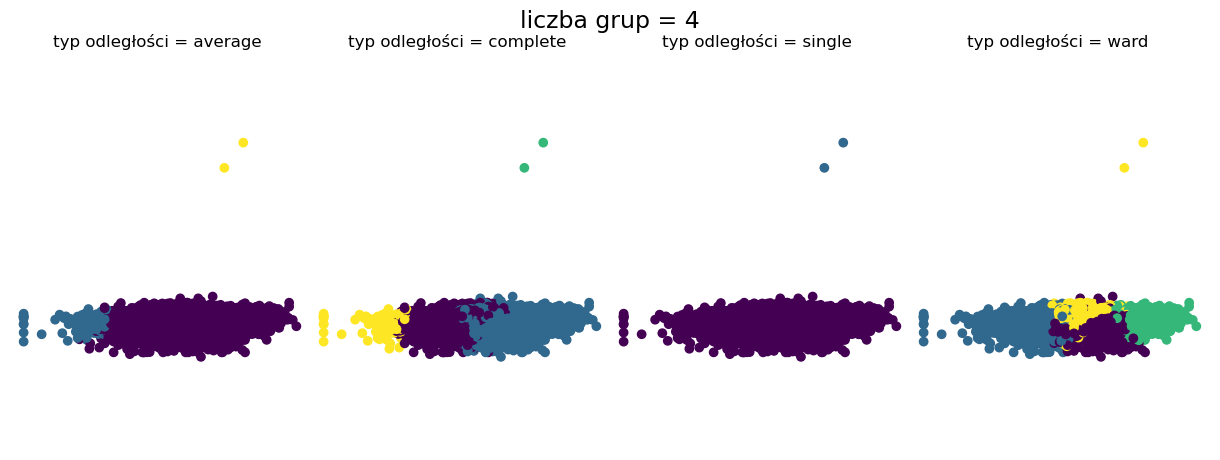

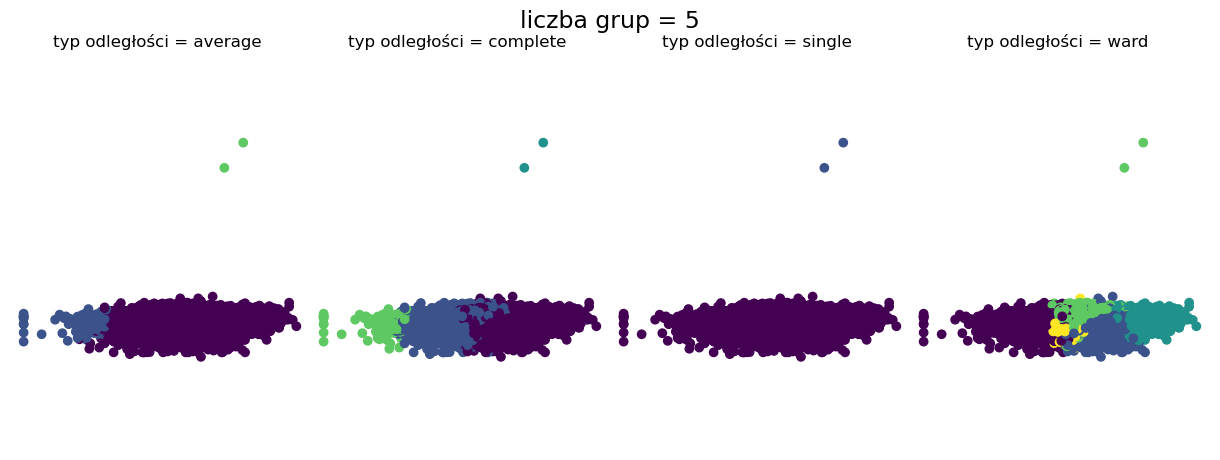

In [17]:
#wyniki grupowania dla różnej liczby grup, w postaci wykresów punktowych
for ile_grup in (2,3,4,5):
    plt.figure(figsize=(12, 4.5))
    #iterujemy po różnych typach odległości
    for index, typ_odleglosci in enumerate(('average', 'complete', 'single', 'ward')):
        plt.subplot(1, 4, index + 1)
        #tworzymy model aglomeracyjnego klastrowania dla kolejnych typów odległości i liczby grup
        model = AgglomerativeClustering(linkage = typ_odleglosci, n_clusters = ile_grup)
        #dopasowujemy ten model do danych
        model.fit(dane)
        plt.scatter(dane["broad jump_cm"], dane["sit and bend forward_cm"], c = model.labels_)
        plt.title('typ odległości = %s ' % typ_odleglosci, fontdict=dict(verticalalignment = 'top'))
        plt.axis('equal')
        plt.axis('off')
        plt.subplots_adjust(bottom = 0, top = .89, wspace = 0, left = 0, right = 1)
        plt.suptitle('liczba grup = %i' % ile_grup, size = 17)

Wykonaliśmy grupowanie algomeracyjne dla czterech typów odległości: 'average', 'complete', 'single' oraz 'ward'. Sprawdziliśmy podział na kolejno 2, 3, 4 i 5 grup. W każdym przypadku wykorzystywaliśmy atrybuty 'broad jump_cm' oraz 'sit and bend forward_cm'  do wykonania grupowania. Miara odległości była za każdym razem euklidesowa.

Widać wyraźnie, że typem odległości dla których wyniki grupowania są najlepsze jest 'ward'. 

Typ 'single' w każdym przypadku bez względu na liczbę grup dokonuje niemal takiego samego grupowania z pojedynczymi obiektami o największych wartościach atrybutu 'sit and bend forward_cm' różniącymi się przyporządkowaniem w poszczególnych grupach. W każdym przypadku mamy jedną grupę zawierającą niemal wszystkie obiekty. Taki podział nie ma sensu.

Typ 'average' wykazuje podobne własności co typ 'single', z tą różnicą, że dla 4 i 5 grup wyróżnia on małą grupę obiektów o najniższych wartościach atrybutu 'broad jump_cm'. Ten podział też nie daje dobrego pogrupowania.

Typ 'complete' daje wyniki nieco lepsze od obu wcześniej wymienionych typów, jednak nadal są one niesatysfakcjonujące. Od liczby grup 3 w górę, zawsze jedna z grup zawiera jedynie dwa obiekty o największej wartości 'sit and bend forward_cm', wyraźnie odstające od pozostałych. Dla tak licznego zbioru nie powinniśmy wyróżniać jednej grupy zawierającej tak małą liczbę obiektów.

Typ 'ward' daje wyniki najlepsze, dla 2 i 3 grup podział daje podzbiory o zbliżonej liczbie obiektów. Dla większej liczby grup zaczynają się one mieszać i są ciężej rozróżnialne, szczególnie dwie czy później trzy grupy "środkowe" - należą do nich te obiekty które mają wartość atrybutu 'broad jump_cm' między pierwszym a trzecim kwartylem. To sugeruje, że podział na 4 i na 5 grup jest zbyt szczegółowy i niepotrzebnie wyodrębniamy tyle grup.

Oceniając każdy z otrzymanych podziałów, można stwierdzić, że dane zostały najlepiej pogrupowane w przypadku 2 lub 3 grup, dla typu odległości 'ward'.

Text(0.5, 1.0, 'macierz pomyłek')

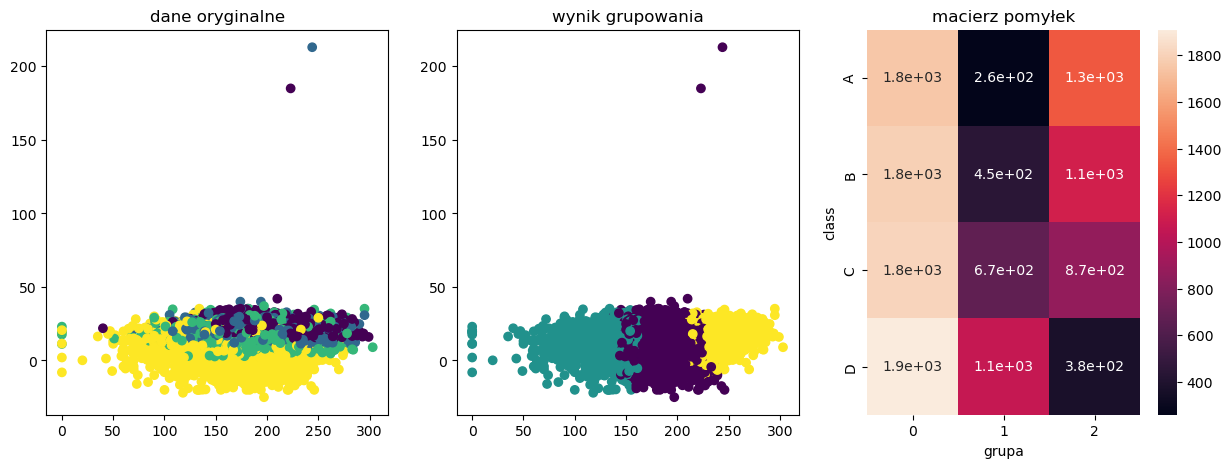

In [18]:
#porównanie wyników grupowania z oryginalnym podziałem, po stwierdzeniu najoptymalniejszej liczby grup i tpu odegłości
ile_grup = 3
model = AgglomerativeClustering(linkage = 'ward', metric = 'euclidean', n_clusters = ile_grup)
model.fit(dane)

klasa = data['class'].astype('category').cat.codes
grupa = model.labels_

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(x = dane["broad jump_cm"], y = dane["sit and bend forward_cm"], c = klasa)
plt.title('dane oryginalne')
plt.subplot(1,3,2)
dane['grupa'] = model.labels_
plt.scatter(x = dane["broad jump_cm"], y = dane["sit and bend forward_cm"], c = grupa)
plt.title('wynik grupowania')
plt.subplot(1,3,3)
pomylki = pd.crosstab(data['class'],dane['grupa'])
sns.heatmap(pomylki,annot = pomylki)
plt.title('macierz pomyłek')

Przedstawiliśmy podział obiektów na klasy w oryginalnym zbiorze danych, a także wyniki grupowania hierarchicznego omówionego w poprzedniej części. Wybraliśmy podział który uznaliśmy za najlepszy, czyli typ odległości 'ward', metryka euklidesowa i 3 grupy. Obok obu wykresów pokazaliśmy także macierz pomyłek.

Widać, że oba podziały są zupełnie różne. Przede wszystkim w oryginalnym zbiorze wyróżnione były 4 grupy, a nasz podział wyróżnia tylko 3. Jednak widać też, że oba podziały są zupełnie różne. W danych oryginalnych do klasy D należą obiekty o mniejszej wartości atrybutu 'sit and bend forward_cm'. Pozostałe trzy klasy mieszają się ze sobą i żadna wartość ani para wartości nie odróżnia grup między sobą. W grupowaniu hierarchicznym podział jest jasny i zależy od wartości atrybutu 'broad jump_cm'. 

Z macierzy pomyłek możemy odczytać jaka liczba obiektów z danej klasy trafiła do określonej grupy. Ponieważ zmieniona jest liczba grup, to macierz nie jest kwadratowa i trudniej wyciągnąć z niej dobre wnioski o różnicy między poszczególnymi grupami. Widać jednak, że do grupy 0 trafiło najwięcej obiektów z poszczególnych klas, natomiast najmniej do grupy 1. Najmniejsze pokrycie ma grupa 1 i klasa C, a największe klasa D i grupa 0. Wynika to jednak w większej mierze z liczebności poszczególnych grup i klas, niż z pokrycia klas i grup.

## Grupowanie metodą k-średnich

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


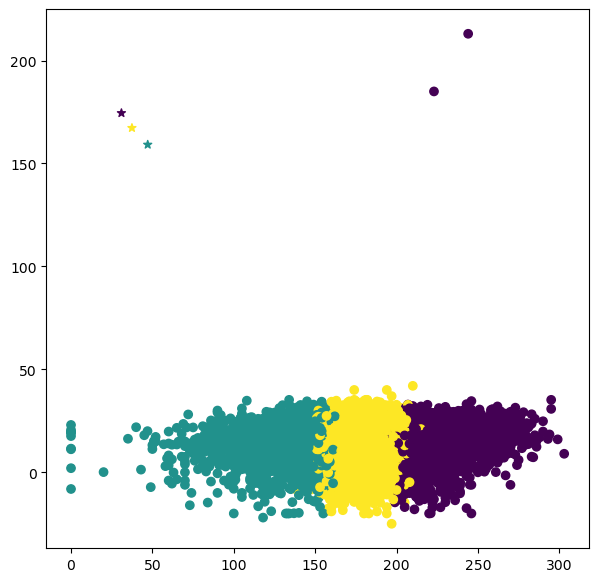

In [19]:
#grupowanie metodą k-średnich
k = 3 #liczba centroidów

kmeans = KMeans(n_clusters = k, random_state = 0)
kmeans.fit(dane)
etykiety_grup = kmeans.fit_predict(dane)
plt.figure(figsize = (7,7))
plt.scatter(dane["broad jump_cm"], dane["sit and bend forward_cm"], marker = 'o', c = etykiety_grup)
#wyświetlanie centroidów na wykresie
centroidy = kmeans.cluster_centers_
plt.scatter(centroidy[:,0], centroidy[:,1], marker = '*', c = np.array(range(k)))

W grupowaniu k-średnich po ustaleniu liczby k = 3 podział na grupy okazuje się bardzo zbliżony do tego otrzymanego w ramach grupowania hierarchicznego.

Zauważalną różnicą jest to, że grupa 2 jest nieco "chudsza" - zawiera mniej obiektów, niż grupa druga w przypadku grupowania hierarchicznego. Zyskuje na tym grupa 1 w której znajduje się znaczna część obiektów należących do grupy 2 w poprzednich podziałach.

Zauważalna zmiana przydziału następuje również dla dwóch obiektów o największej wartości atrybutu 'sit and bend forward_cm'. W przypadku gurpowania hierarchicznego zostały przydzielone do grupy 2. Tutaj przydział jest do grupy 3.

Warto odnotować, że wszystkie trzy centroidy znajdują się bardzo blisko siebie.

C:\Users\Janek\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Janek\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Janek\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Janek\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

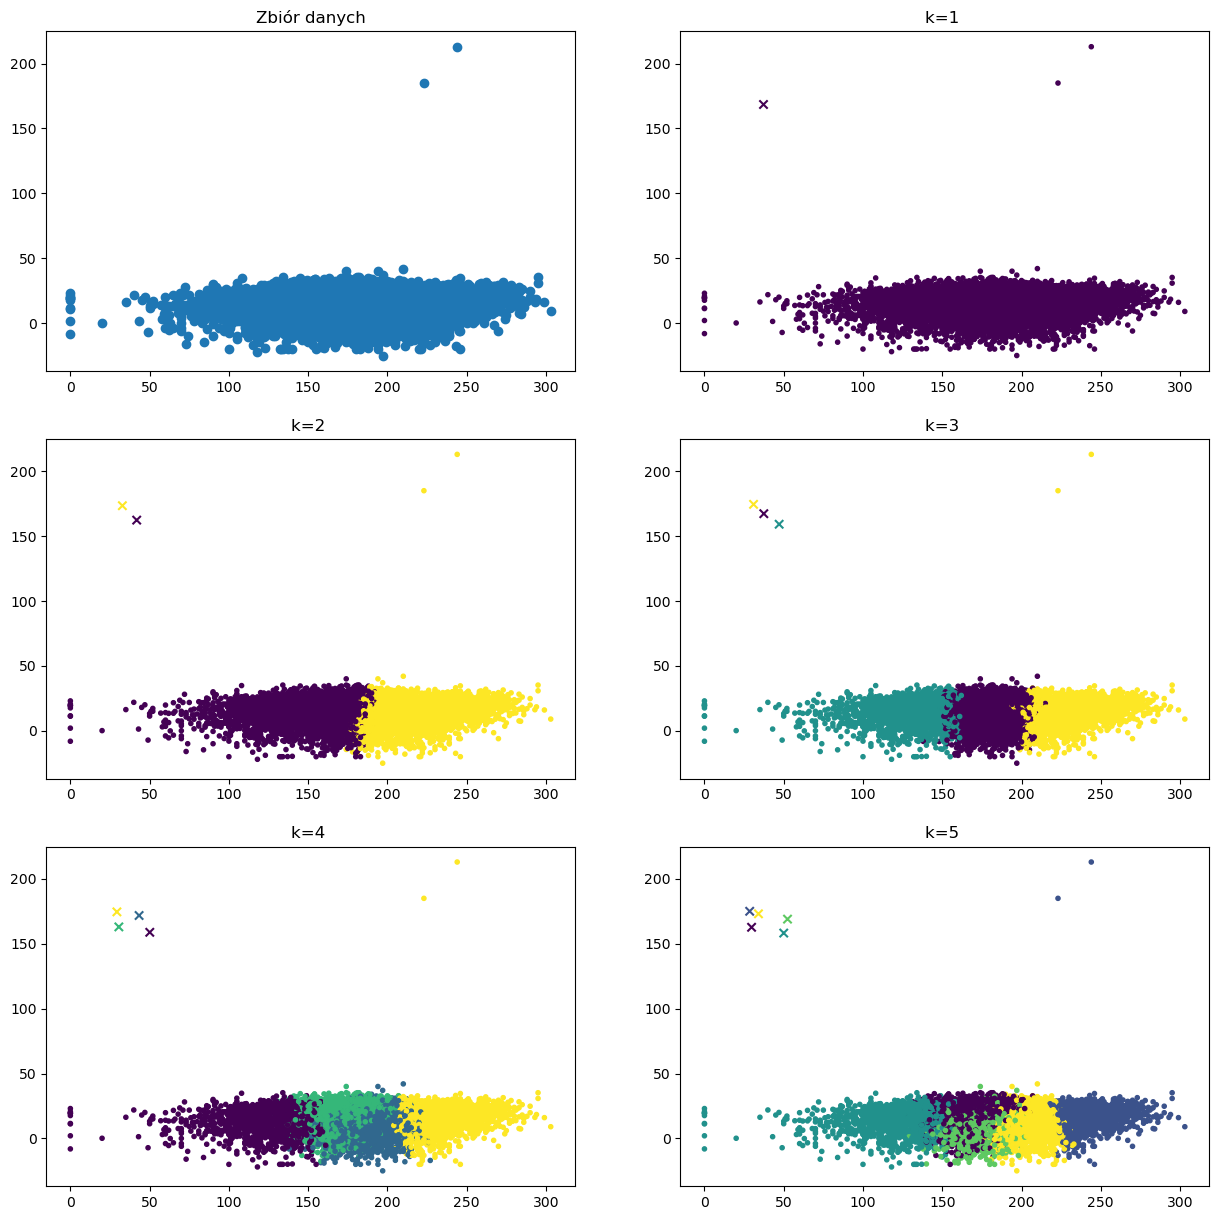

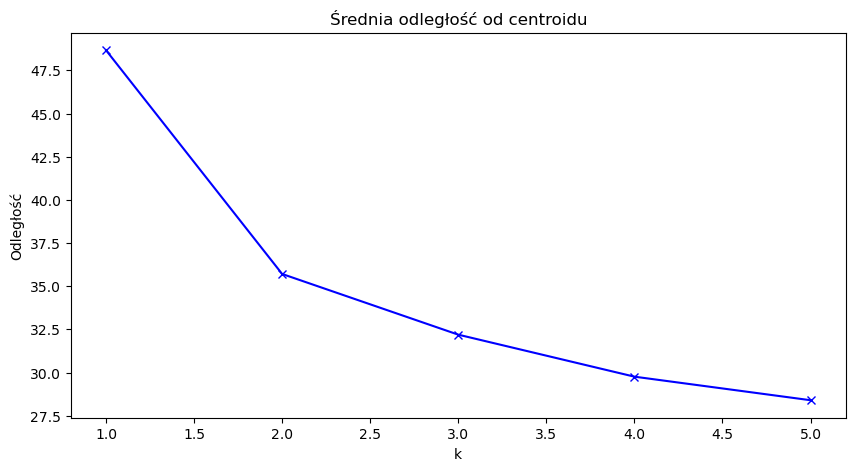

In [20]:
#badamy wyniki grupowania dla różnej liczby k

maks_k = 5
zakres_k = range(1,maks_k)
ile_w_pionie = int(maks_k/2) + 1
plt.figure(figsize=(15,15))
plt.subplot(ile_w_pionie,2,1)
plt.scatter(dane["broad jump_cm"], dane["sit and bend forward_cm"])
plt.title('Zbiór danych')
srednia_odl = []
pozycja = 2

#iterujemy po rosnących wartościach k
for k in range(1,maks_k+1):
    plt.subplot(ile_w_pionie,2,pozycja)
    pozycja = pozycja + 1
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(dane)
    etykiety_klastrow = kmeans.fit_predict(dane)
    plt.scatter(x = dane["broad jump_cm"], y = dane["sit and bend forward_cm"], marker='.', c=etykiety_klastrow)
    centroidy = kmeans.cluster_centers_
    plt.scatter(centroidy[:,0], centroidy[:,1], marker='x', c=np.array(range(k)))
    plt.title('k=%s ' % k)
    srednia_odl.append(sum(np.min(cdist(dane, centroidy, 'euclidean'), axis=1)) / dane.shape[0]) 

#wykres łokciowy średniej odległości punktów od centroidów, w zależności od liczby k
plt.figure(figsize=(10,5))
plt.plot(range(1,maks_k+1), srednia_odl, 'bx-')
plt.xlabel('k')
plt.ylabel('Odległość')
plt.title('Średnia odległość od centroidu')
plt.show()

W przypadku zmiany liczby grup, dla każdego k, podział jest taki sam jak dla grupowania aglomeracyjnego z typem odległości 'ward'. Po raz kolejny podział wygląda najlepiej dla 2 i 3 grup. Po raz kolejny podział w wyniku grupowania znacząco odbiega od tego który był w przypadku oryginalnego zbioru danych.

Dla k większego od 3 podział w grupach "środkowych" przestaje być klarowny, a poszczególne grupy 2 i 3, dla k = 4 oraz 2, 3 i 4 dla k = 5 mieszają sie ze sobą i nie da się rozróżnić obiektów między tymi grupami.

Podobne wnioski można wyciągnąć z obserwacji wykresu łokciowego. Jego przegięcie jest widoczne dla k = 2 i k = 3. Wykres łokciowy nie daje nam jednoznacznego rozstrzygnięcia, który z podziałów jest lepszy, więc zastosujemy metodę sylwetkową. 

### Metoda sylwetkowa

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

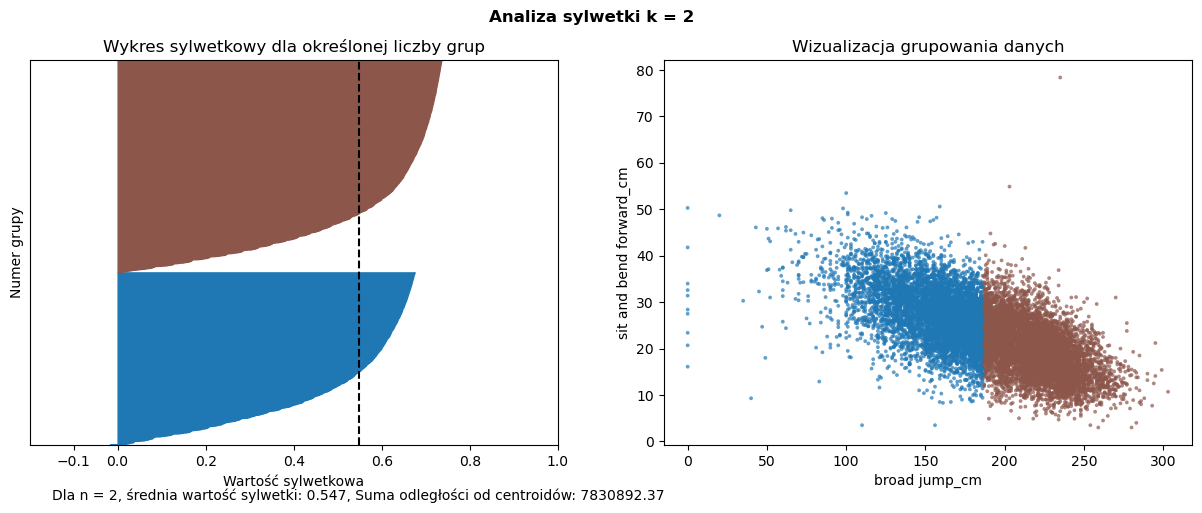

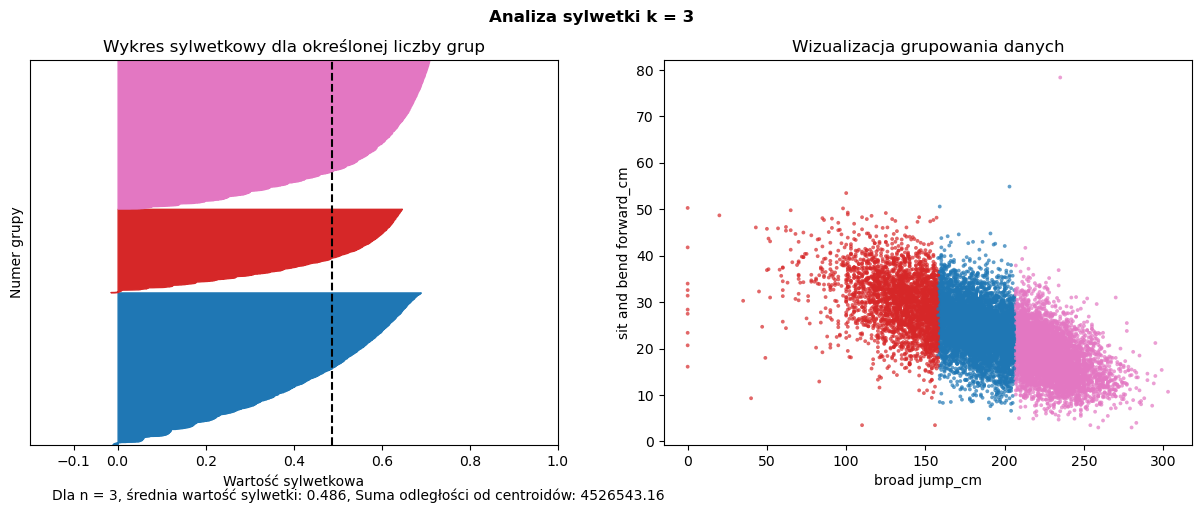

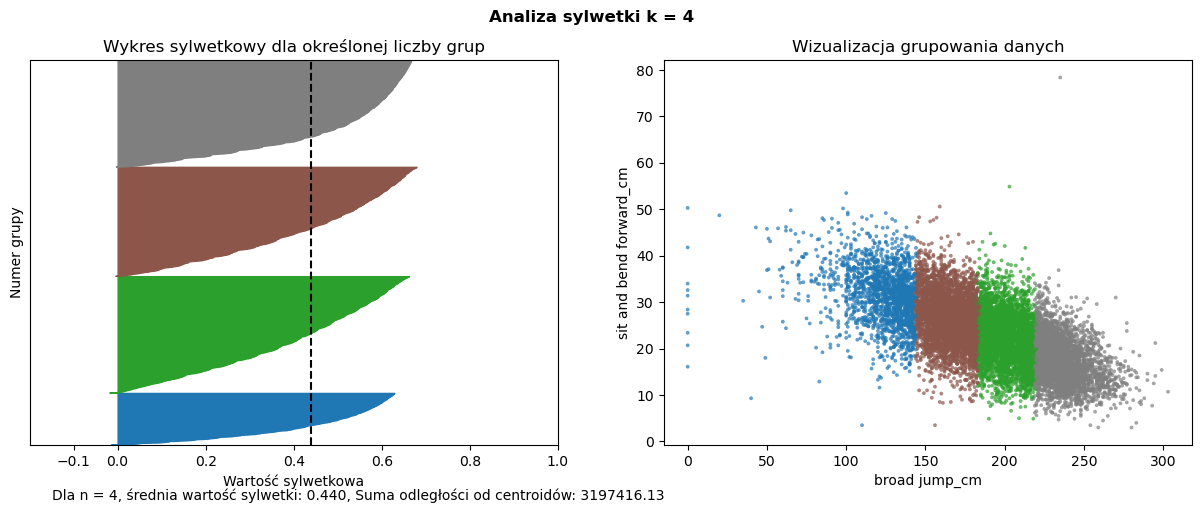

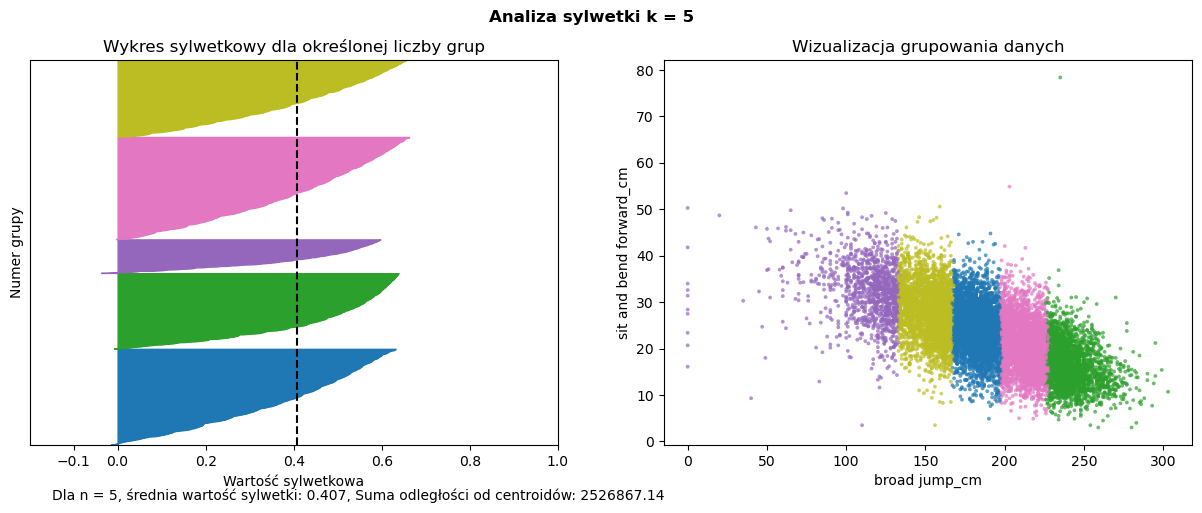

In [21]:
#badane liczby grup
group_numbers = [2, 3, 4, 5]
miara_jakosci = pd.Series()

#wykresy sylwetkowe oraz 
for ngroups in group_numbers :
    #miejsce na wydruk każdej iteracji, 1 wiersz, 2 kolumny
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)

    #zakres zmian współczynnika sylwetki
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(dane) + (ngroups + 1) * 10])

    kmeans = KMeans(n_clusters = ngroups, random_state = 0).fit(dane)
    group_labels = kmeans.fit_predict(dane[["broad jump_cm","sit and bend forward_cm"]])

    #obliczenie miary sylwetek
    silhouette = silhouette_samples(dane[["broad jump_cm","sit and bend forward_cm"]], group_labels)
    #średnia wartość sylwetki
    average_silhouette = silhouette_score(dane[["broad jump_cm","sit and bend forward_cm"]], group_labels)

    line_pos = 10
    for i in range(ngroups):
        silhouette_in_group = silhouette[group_labels == i]
        silhouette_in_group.sort()

        liczebnosc_grupy = silhouette_in_group.shape[0]
        color = cm.tab10(float(i) / ngroups)
        ax1.fill_betweenx(np.arange(line_pos, line_pos + liczebnosc_grupy), 0, silhouette_in_group, color = color)
        #Wyliczenie przesunięcia w pionie dla wykresu kolejnej grupy
        line_pos += liczebnosc_grupy + 10
    
    ax1.set_title('Wykres sylwetkowy dla określonej liczby grup')
    ax1.set_xlabel('Wartość sylwetkowa')
    ax1.set_ylabel('Numer grupy')

    #wartość średnia sylwetki, linia przerywana na wykresie
    ax1.axvline(x = average_silhouette, color = 'black', linestyle = '--')
    #wyczyszczenie osi y
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    #przedstawienie klastrów na wykresie
    colory = cm.tab10(group_labels.astype(float) / ngroups)
    ax2.scatter(dane["broad jump_cm"], dane["body fat_%"], marker = '.', s = 30, lw = 0, alpha = 0.7,c = colory)

    ax2.set_title('Wizualizacja grupowania danych')
    ax2.set_xlabel("broad jump_cm")
    ax2.set_ylabel("sit and bend forward_cm")

    plt.suptitle(('Analiza sylwetki k = %d' % ngroups),  fontweight = 'bold')
    plt.figtext(0.14, 0, ('Dla n = %d, średnia wartość sylwetki: %.3f, Suma odległości od centroidów: %.2f'
        % (ngroups, average_silhouette, kmeans.inertia_ ) ))

Z analizy wykresów sylwetkowych nie jesteśmy w stanie uzyskać satysfakcjonujacych nas wniosków. W przypadku każdego podziału każda z sylwetek niemal w takim samym stopniu przekracza średnią wartość. Na podstawie tych odczytów nie jesteśmy zatem w stanie uzyskać informacji dotyczącej tego jaki podział będzie najlepszy dla tych danych. 

**Wnioski ogólne:**

1. Pierwotny Podział Danych:

W pierwszym etapie analizy stwierdziliśmy, że pierwotny podział danych wydaje się być niepoprawny. Klasy były niemal nierozróżnialne, co sprawiło trudności w wyborze atrybutów, które jednoznacznie mogłyby określić przynależność do danej klasy.

2. Grupowanie K-średnich vs. Hierarchiczne:

Przeprowadzenie grupowania za pomocą algorytmu k-średnich nie dostarczyło jednoznacznej odpowiedzi w kwestii podziału na grupy. Skuteczniejsze rezultaty uzyskaliśmy, stosując grupowanie hierarchiczne. Ta metoda wskazała, że optymalny podział powinien obejmować 3 grupy.

3. Anomalie w Badanym Zbiorze:

Zauważyliśmy także niezwykłą anomalię w analizowanym zbiorze danych. Atrybut 'sit and bend forward_cm' posiadał wartości ujemne, co jest niezwykłe i może wskazywać na błąd lub nietypowy przypadek w danych. Konieczne może być dokładniejsze zbadanie źródła tych danych oraz podjęcie kroków w celu korekty błędów, jeśli istnieją.

